# Explainable and Responsible AI Toolkit (v3.0 - 2023-09)
***Developed by AI&I COE***

The **DSAI Explainable and Responsible AI (XRAI) Toolkit** is a complementary tool to the [XRAI Guidelines document](https://unionbankphilippines.sharepoint.com/:b:/s/DataScienceInsightsTeam/EbGWZEJkn7REt1zzHspu-xABsLDpD1eD6mgHMjPJypnzdA?e=wm55U7) <change this link to the GitHub link. The Toolkit provides a one-stop tool for technical tests were identified by packaging widely used open-source libraries into a single platform, according to ADI/DSAI user needs. These tools include Python libraries such as `shap`, `dalex`, `dice-ml`, `alibi`, `netcal`, `aif360`, `scikit-learn`, and UI visualization libraries such as `raiwidgets` and `plotly`. This toolkit aims to: 
- Provide a user interface to guide users step-by-step in the testing process; 
- Support certain binary classification and regression models that use tabular data 
- Produce a basic summary report to help DSAI System Developers and Owners interpret test results 
- Intended to be deployable in the user’s environment

Subsequent versions and updates will be found in the XRAI [GitHub repo](https://github.com/aboitiz-data-innovation/XRAI), accompanied by XRAI Brownbag sessions.

# Introduction
## Assumptions / Limitations
The toolkit is in its second iterations of development. As such, there are limitations which hinders the Toolkit from being able to handle certain models and display other XRAI-related features. These include:
- Only Python users for V3. An R-based Toolkit may be released according to demand and necessity for later versions 
- This is mostly intended for classification and regression models; unsupervised models may run on some functions but are not guaranteed to work or provided correct insight.
- Certain features may be discussed in Guidelines V3 but are not yet in Toolkit V3
- This toolkit does not define ethical standards. It provides a way for DSAI System Developers and Owners to demonstrate their claims about the performance of their DSAI systems according to the XRAI principles

## Inputs
Our interactive toolkit only needs two main inputs before any major analysis:
- Model (.pkl or .sav)
- Data (train, test) (.csv) 

We intend for the user to have inputs mostly on the XRAI-related functions. However, we need the user to manually input **the names of train and test file**, in addition to target variable name. Prompts will be shown later in the notebook where you will need to load. In the shared folder we have provided sample model and data (test_data.csv, train_data.csv, finalized_model.pkl). For testing for different models and data you may just replace files.

## Features found in the Toolkit
- EDA – User-friendly, no-code custom visualizations to help you analyze your data's quality and distribution
- Fairness Preprocessing – Ready-made functions to clean and catch potential bias in data prior to model development
- Fairness Metrics – Find out which factors are disadvantaged by the model, and receive recommendations on how to mitigate unfairness
- Model Performance – Statistics of predicted outcome, dataset features, and error groups
- Local Explanations – Understand how a model affects individual explanations with a variety of techniques
- Global Explanations – Understand how a model is shaped
- Stability Analysis – OOT validation, data and model quality, how data and concepts decays over time
- Outlier Analysis – resampling, pre-model and post-model views
- What-if Analysis – counterfactual measures; showing how result for individual data point may change if one of its feature values was changed
- Robustness – Check if system can function despite unexpected inputs 
- Uncertainty – Models may not always make perfect predictions, and there can be some level of doubt or variability associated with their result

# File and model selection
Ingest the test and train csv files, target features, and model. 

In [ ]:
# Call functions
import warnings
warnings.filterwarnings("ignore")

# %matplotlib inline
import pandas as pd
import numpy as np

# load model and data
from model_ingestion.data_model import load_data_model

# EDA
from eda.auto_eda import *

# Performance overview 
from fairness.fairness import model_performance

# Fairness
from fairness.fairness import fairness
from fairness.fairness_algorithm import *
from fairness.cluster_metrics import *

# Local explanation
from local_exp.local_exp import *

# Global explanation
from global_exp.global_exp import *

# Stability
from stability.stability import *
from stability.decile import *

#Outlier
from fairness.outlier import *

#Uncertainty
from uncertainty.calibration import *
from uncertainty.uct import *

#ExplainerDashboard
from explainerdashboard import *
from eda.dashboard import *
from fairness.dashboard import *
from local_exp.dashboard import *
from global_exp.dashboard import *
from stability.dashboard import *
from robustness.dashboard import *
from uncertainty.dashboard import *
import dash_bootstrap_components as dbc

# Display
from IPython.display import display
from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display = 'diagram')

import shap
shap.initjs()

import os
os.getcwd()

In [ ]:
# # load required datasets and model -- regression example. Comment out if using classification use case

# train_data = 'data/property_valuation/train_property_valuation.csv' ## INPUT HERE
# test_data = 'data/property_valuation/test_property_valuation.csv' ## INPUT HERE
# model_path = {"LGBM":'models/property_valuation/property_valuation_lgbm.sav',"DT":'models/property_valuation/property_valuation_decision_tree.sav'} ## INPUT HERE
# target_feature = 'price_sqm' ## INPUT HERE

# X_train, y_train, X_test, y_test, train_data, test_data, model = load_data_model(train_data, test_data, model_path, target_feature)

# cont = X_train.select_dtypes(include = np.number).columns.tolist()
# cat = X_train.select_dtypes(exclude = np.number).columns.tolist()

# reg = True

In [ ]:
# load required datasets and model -- classification example. Comment out if using regression use case

import sklearn
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

X_train = pd.read_csv(f'data/loans/loans_X_train.csv', index_col = 0)
X_test = pd.read_csv(f'data/loans/loans_X_test.csv', index_col = 0)
y_train = pd.read_csv(f'data/loans/loans_y_train.csv', index_col = 0).squeeze()
y_test = pd.read_csv(f'data/loans/loans_y_test.csv', index_col = 0).squeeze()

train_data = pd.concat([X_train, y_train], axis = 1)
test_data = pd.concat([X_test, y_test], axis = 1)

target = ['loan_status']

drop_cols = ['id', 'member_id', 'issue_d', 'title', 'zip_code', 'addr_state', 'last_pymnt_d',
             'next_pymnt_d', 'last_credit_pull_d', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']

# ord_cols = [#'grade', 'sub_grade', 
#             'earliest_cr_line', 'emp_length']

num_cols = list(set(train_data.select_dtypes(include = ['int64', 'float64']).columns.tolist()) - set(drop_cols) - set(target))
cat_cols = list(set(train_data.select_dtypes(exclude = ['int64', 'float64']).columns.tolist()) - set(drop_cols) - set(target))

rem_cols = list(set(train_data.columns.tolist()) - set(num_cols) - set(cat_cols) - set(drop_cols) - set(target))

print('Numerical Columns:\n', num_cols)
print('\nCategorical Columns:\n', cat_cols)
print('\nRemaining Columns:\n', rem_cols)

cont = X_train.select_dtypes(include = np.number).columns.tolist()
cat = X_train.select_dtypes(exclude = np.number).columns.tolist()

seed = 42

numerical = Pipeline(
    steps = [
        ('num_imputer', KNNImputer()),
        ('scaler', StandardScaler())
    ]
)

categorical = Pipeline(
    steps = [
        ('cat_imputer', SimpleImputer(strategy = 'constant', fill_value = 'No Data')),
        ('ohe', OneHotEncoder(handle_unknown = 'ignore'))
    ]
)

preproc = ColumnTransformer([
    ('num', numerical, num_cols),
    ('cat', categorical, cat_cols),
    ('drop', 'drop', drop_cols),
])

# Decision Tree
pipe = Pipeline(
    steps = [
        ('preproc', preproc),
        ('clr', DecisionTreeClassifier(random_state = seed, criterion = 'gini',
                                      max_depth = 22, max_features = .75))
    ]
)
pipe.fit(X_train, y_train)
model_dt = pipe

# Random Forest
pipe = Pipeline(
    steps = [
        ('preproc', preproc),
        ('clf', RandomForestClassifier(random_state = seed, criterion = 'gini',
                                      max_depth = None, max_features = 'log2',
                                      n_estimators = 250))
    ]
)
pipe.fit(X_train, y_train)
model_rf = pipe

# XGBoost
pipe = Pipeline(
    steps = [
        ('preproc', preproc),
        ('clf', XGBClassifier(max_depth = 25, n_estimators = 250, random_state = seed))
    ]
)
pipe.fit(X_train, y_train)
model_xgb = pipe

model = {'DT': model_dt,
         'RF': model_rf,
         'XGB': model_xgb}

preprocessor = model['DT'][0]
preprocessor2 = model['RF'][0]
preprocessor3 = model['XGB'][0]

reg = False

In [ ]:
# # For clustering
# dataset = pd.read_csv("data/Data.csv", index_col=0)
# model = {}
# input_file = open('models/mean_shift_09_11_2023.sav', "rb")
# model['MS'] = joblib.load(input_file)
# X_train = dataset.drop(columns='Cluster',axis=1)
# Y_train = dataset['Cluster']

In [ ]:
X_train.head()

# Auto-EDA

In [ ]:
dataset = pd.concat([train_data, test_data], axis = 0)

In [ ]:
dtale_eda(dataset)

This might take a while depending on the size of the dataframe.

In [ ]:
# # Will take long
autoviz_eda2(dataset)

In [ ]:
# # This will take a while!
ydata_profiling_eda2(dataset)

# Error Analysis

In [ ]:
from raiwidgets import ErrorAnalysisDashboard, ExplanationDashboard
from interpret.ext.blackbox import TabularExplainer
# Explainer Used: Mimic Explainer
from interpret.ext.blackbox import MimicExplainer
from interpret.ext.glassbox import LinearExplainableModel
from interpret.ext.glassbox import LGBMExplainableModel
from interpret_community.common.constants import ShapValuesOutput, ModelTask

if not reg:
    preproc = model['DT'][0]
    dataset = pd.concat([train_data, test_data], axis=0)

    # For lending club loans case
    target = ['loan_status']

    drop_cols = ['id', 'member_id', 'issue_d', 'title', 'zip_code', 'addr_state', 'last_pymnt_d',
                'next_pymnt_d', 'last_credit_pull_d', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']

    num_cols = list(set(dataset.select_dtypes(include = ['int64', 'float64']).columns.tolist()) - set(drop_cols) - set(target))
    cat_cols = list(set(dataset.select_dtypes(exclude = ['int64', 'float64']).columns.tolist()) - set(drop_cols) - set(target))
    
    feature_names = X_train.columns.tolist()

In [ ]:
if not reg:
    classes = ['Accepted', 'Rejected']

    # Separate model and preprocessor objects
    explainer = TabularExplainer(model['DT'][-1], X_train, features = feature_names, classes = classes, transformations = preprocessor,
                                allow_all_transformations = True)

    # 1. Using SHAP TabularExplainer
    model_task = ModelTask.Classification
    predictions_dt = model['DT'].predict(X_test)
    ErrorAnalysisDashboard(dataset = X_test, true_y = y_test.to_numpy(), features = feature_names, pred_y = predictions_dt)

In [ ]:
# Import required libraries xrai features
from responsibleai import RAIInsights
# From responsibleai.feature_metadata import FeatureMetadata
from raiutils.cohort import Cohort, CohortFilter, CohortFilterMethods
from raiwidgets.responsibleai_dashboard import ResponsibleAIDashboard

# XRAI feature
def xrai_features(model, train_data, test_data_sample, target_feature, task_type = 'classification', categorical_features = None):
    '''
    input: model, train_data, test_data_sample, target_feature
        :test_sample_data- here you can either use entire test data or can take random sample of test data for better visualization
    output: 
    :rai_insights- explainer() to give explaination of data statistics, model overview and feature importance
    error_analysis() it gives detailed analysis of automated and customised error segments
    cohort_list - default and required cohorts/groups are true_y values, pred_y values and Cohort on index of the row in the dataset
    '''

    # Add 's1' as an identity feature
    '''
    param identity_feature_name: Name of the feature which helps to uniquely identify a row or instance in user input dataset. 
    Feature metadata for the train/test dataset to identify different kinds of features in the dataset.
    '''
    # feature_metadata = FeatureMetadata(identity_feature_name='s1')


    # RAI_Insights 
    '''
    This is responsibleai in-built library function that requires input- train, test data, model and target_feature
    We can choose task as classification or regression
    If we would like to get better understanding of categorical features we have scope to provide categorical features along with category
    This function manily takes input parameter and create a class for further features analysis

    Defines the top-level Model Analysis API.
    Use RAIInsights to analyze errors, explain the most important features, data exploration 
    and model evaluation in a single API.
    ''' 
    rai_insights = RAIInsights(model, train_data, test_data_sample, target_feature,
                               task_type = task_type, categorical_features = categorical_features)

    # define XRAI features
    # Interpretability : Data statistics Exploration, feature importance, and model overview
    # rai_insights.explainer.add()
    # Error Analysis
    rai_insights.error_analysis.add()

    # compute features
    rai_insights.compute()
    

    # Cohort analysis
    '''
    Here we can also create custom cohort considering different variables and their their subgrouprs
    For example: age>40 and age<70 
                 or combination of 2 or more variables subgroups
    We have same capability in UI as well. 
    In coming version we are going to add capabilities via code.
    '''
    # Cohort on index of the row in the dataset
    cohort_filter_index = CohortFilter(method=CohortFilterMethods.METHOD_LESS,arg=[20],column='Index')
    user_cohort_index = Cohort(name='Cohort Index')
    user_cohort_index.add_cohort_filter(cohort_filter_index)

    # Cohort on predicted target value
    cohort_filter_predicted_y = CohortFilter(method=CohortFilterMethods.METHOD_INCLUDES,arg=[1],column='Predicted Y')
    user_cohort_predicted_y = Cohort(name='Cohort Predicted Y')
    user_cohort_predicted_y.add_cohort_filter(cohort_filter_predicted_y)

    # Cohort on true target value
    cohort_filter_true_y = CohortFilter(method=CohortFilterMethods.METHOD_INCLUDES,arg=[1],column='True Y')
    user_cohort_true_y = Cohort(name='Cohort True Y')
    user_cohort_true_y.add_cohort_filter(cohort_filter_true_y)

    cohort_list = [user_cohort_index, user_cohort_predicted_y, user_cohort_true_y]

    return rai_insights, cohort_list

In [ ]:
if not reg:
    rai_insights, cohort_list = xrai_features(model['DT'], train_data.drop(drop_cols, axis = 1),
                                            test_data.drop(drop_cols, axis = 1), 'loan_status', categorical_features = cat_cols
                                            )

    # Create Dashboard
    ResponsibleAIDashboard(rai_insights, cohort_list=cohort_list)

In [ ]:
if not reg:
    explainer = TabularExplainer(model['DT'][-1], 
                                X_train, 
                                features = preprocessor.get_feature_names_out(), 
                                # classes=classes
                                )
    # Take 50 samples from the test data
    X_test_sample = X_test.sample(n=50, random_state=5)

    # Generate global explanations
    global_explanation = explainer.explain_global(preprocessor.transform(X_test_sample))

In [ ]:
if not reg:    
    ExplanationDashboard(global_explanation, model['DT'][-1], dataset = preprocessor.transform(X_test_sample), true_y=y_test.loc[X_test_sample.index])

In [ ]:
if not reg:
    ErrorAnalysisDashboard(global_explanation, model['DT'][-1], dataset = preprocessor.transform(X_test_sample), true_y=y_test.loc[X_test_sample.index])

In [ ]:
if reg:
    pipe = model['DT'][:-1]
    features = pipe.get_feature_names_out()
    pipe.fit(X_train)
    X_test_proc = pd.DataFrame(pipe.transform(X_test), columns=features)
    predictions = model['DT'][-1].predict(X_test_proc)
    ErrorAnalysisDashboard(dataset=X_test_proc, true_y=y_test, features=features, pred_y=predictions, model_task='regression')

# Uncertainty

## Post-hoc Calibration

In [ ]:
if reg:
    y_pred_test = model['DT'].predict(X_test)
if not reg:
    y_pred_test = model['DT'].predict_proba(X_test)[:, 1]

### Logistic Calibration
Also known as Platt scaling, trains an SVM and then trains the parameters of an additional sigmoid function to map the SVM outputs into probabilities. -- https://www.researchgate.net/publication/2594015_Probabilistic_Outputs_for_Support_Vector_Machines_and_Comparisons_to_Regularized_Likelihood_Methods

In [ ]:
if reg:
    lc, lc_calibrated = calib_lc(y_pred_test, y_test, True)
if not reg:
    lc, lc_calibrated = calib_lc(y_pred_test, y_test.to_numpy())

### Beta Calibration
A well-founded and easily implemented improvement on Platt scaling for binary classifiers. Assumes that per-class scores of classifier each follow a beta distribution. -- http://proceedings.mlr.press/v54/kull17a/kull17a.pdf

In [ ]:
if reg:
    bc, bc_calibrated = calib_bc(y_pred_test, y_test, True)
if not reg:
    bc, bc_calibrated = calib_bc(y_pred_test, y_test.to_numpy())

### Temperature Scaling
Single-parameter variant of Platt Scaling -- https://arxiv.org/abs/1706.04599

In [ ]:
if reg:
    temp, temp_calibrated = calib_temp(y_pred_test, y_test, True)
if not reg:
    temp, temp_calibrated = calib_temp(y_pred_test, y_test)

### Histogram Binning
Each prediction is sorted into a bin and assigned a calibrated confidence estimate. -- https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.29.3039&rep=rep1&type=pdf

In [ ]:
if reg: # Not recommended
    hb, hb_calibrated = calib_hb(y_pred_test, y_test, reg = True)
if not reg:
    hb, hb_calibrated = calib_hb(y_pred_test, y_test)

### Isotonic Regression
For classification: Similar to `HistogramBinning` but with dynamic bin sizes and boundaries. A piecewise constant function gets for to ground truth labels sorted by given confidence estimates. -- https://www.researchgate.net/publication/2571315_Transforming_Classifier_Scores_into_Accurate_Multiclass_Probability_Estimates

For regression: piecewise constant, monotonically increasing mapping function used to recalibrate the estimated CDF of a probabilistic forecaster. Goal is to achieve quantile calibration. -- http://proceedings.mlr.press/v80/kuleshov18a/kuleshov18a.pdf

In [ ]:
if reg:
    ir, ir_calibrated = calib_ir(y_pred_test, y_test, reg = True)
if not reg:
    ir, ir_calibrated = calib_ir(y_pred_test, y_test)

### Bayesian Binning into Quantiles (BBQ)
Utilizes multiple `HistogramBinning` instances with different amounts of bins, and computes a weighted sum of all methods to obtain a well-calibrated confidence estimate. -- https://www.dbmi.pitt.edu/wp-content/uploads/2022/10/Obtaining-well-calibrated-probabilities-using-Bayesian-binning.pdf

In [ ]:
if reg: # Not recommended
    bbq, bbq_calibrated = calib_bbq(y_pred_test, y_test, score = 'BIC', reg = True)
if not reg:
    bbq, bbq_calibrated = calib_bbq(y_pred_test, y_test)

### Ensemble of Near Isotonic Regressions 
Allows a violation of monotony restrictions. Using the modified Pool-Adjacent-Violaters Algorithm (mPAVA), this method builds multiple Near Isotonic Regression Models and weights them by a certain score function. -- https://ieeexplore.ieee.org/document/7837860/

In [ ]:
if not reg:
    enir, enir_calibrated = calib_enir(y_pred_test, y_test)
    display(enir_calibrated)

### Visualizing Calibration (Reliability Diagram)

In [ ]:
n_bins = 100
if reg:
    calibs = {
        'Uncalibrated': y_pred_test,
        'Logistic Calibration': lc_calibrated,
        'Beta Calibration': bc_calibrated,
        'Temperature Scaling': temp_calibrated,
        # 'Histogram Binning': hb_calibrated,
        'Isotonic Regression': ir_calibrated,
        # 'Bayesian Binning into Quantiles': bbq_calibrated,
        # 'Ensemble of Near Isotonic Regression': enir_calibrated
    }
    calibs_df = calib_metrics(y_test, calibs, n_bins, reg = True)
if not reg:
    calibs = {
        'Uncalibrated': y_pred_test,
        'Logistic Calibration': lc_calibrated,
        'Beta Calibration': bc_calibrated,
        'Temperature Scaling': temp_calibrated,
        'Histogram Binning': hb_calibrated,
        'Isotonic Regression': ir_calibrated,
        'Bayesian Binning into Quantiles': bbq_calibrated,
        'Ensemble of Near Isotonic Regression': enir_calibrated
    }
    calibs_df = calib_metrics(y_test, calibs, n_bins)

In [ ]:
if not reg:
    calibs = {
        # 'Uncalibrated': [y_pred_test, model],
        'Logistic Calibration': [lc_calibrated, lc],
        'Beta Calibration': [bc_calibrated, bc],
        'Temperature Scaling': [temp_calibrated, temp],
        'Histogram Binning': [hb_calibrated, hb],
        'Isotonic Regression': [ir_calibrated, ir],
        'Bayesian Binning into Quantiles': [bbq_calibrated, bbq],
        'Ensemble of Near Isotonic Regression': [enir_calibrated, enir]
    }
    for k, v in calibs.items():
        fig = plot_reliability_diagram(y_test, v[0], v[1], title = k, error_bars = True, n_bins = 50)
if reg:
    calibs = {
        # 'Uncalibrated': [y_pred_test, model],
        'Logistic Calibration': [lc_calibrated, lc],
        'Beta Calibration': [bc_calibrated, bc],
        'Temperature Scaling': [temp_calibrated, bc],
        #'Histogram Binning': [hb_calibrated, hb],
        'Isotonic Regression': [ir_calibrated, ir],
        # 'Bayesian Binning into Quantiles': [bbq_calibrated, bbq],
        # 'Ensemble of Near Isotonic Regression': [enir_calibrated, enir]
    }
    for k, v in calibs.items():
        fig = plot_reliability_diagram(y_test, v[0], v[1], title = k, error_bars = True, n_bins = 50, reg = True)

In [ ]:
fig[0]

### Uncertainty Toolbox

In [ ]:
uct_data_dict = uct_manipulate_data(X_train, X_test, y_train, y_test, model['DT'])
uct_data_dict

In [ ]:
uct_metrics = uct_get_all_metrics(uct_data_dict)

Plot adversarial group calibration plots by varying group size from 0% to 100% of dataset size and recording the worst calibration occurred for each group size.

In [ ]:
fig = uct_plot_adversarial_group_calibration(uct_metrics)
fig

Plot the observed proportion vs prediction proportion of outputs falling into a range of intervals, and display miscalibration area.

In [ ]:
fig = uct_plot_average_calibration(uct_data_dict, uct_metrics)
fig

The above plot gives information about our model’s average calibration, i.e. to produce the plot, we consider the prediction intervals across the entire test set. While this is an important indicator of our model’s performance, it does not guarantee that our model is correct. A truly correct model would be [individually calibrated](https://arxiv.org/abs/2006.10288), but individual calibration usually cannot be measured with a finite dataset.

Instead, we can use adversarial group calibration, a metric  that was introduced by [Zhao et. al.](https://arxiv.org/abs/2006.10288). This involves taking many random subsets of the test data, computing miscalibration on each subset, and then reporting the worst miscalibration across the subsets. The plot below shows this metric as we vary the size of the subsets constructed ($x$-axis). For each subset size the procedure is repeated several times and the shaded region shows the standard error. Note that an individually calibrated model should have low calibration error for any group size.

Below, plot predictions and predictive intervals versus true values, with points ordered by true value along x-axis.

In [ ]:
fig = uct_plot_ordered_intervals(X_train, X_test, y_train, y_test, uct_data_dict, uct_metrics, non_neg=True)
fig

In [ ]:
if reg:
    fig = uct_plot_XY(X_train, X_test, y_train, y_test, uct_data_dict, uct_metrics, column='land_size', target_feature = target_feature, non_neg=True)
elif not reg:
    fig = uct_plot_XY(X_train, X_test, y_train, y_test, uct_data_dict, uct_metrics, column = 'grade', target_feature = target[0], non_neg = True)
fig

If one wants to constrain the recalibrated distribution to be Gaussian, the toolbox provides a way to compute a scaling factor for the standard deviation. This scaling factor can be optimized with respect to a variety of metrics.

# Outlier Detection

Types of Outlier Detection methods:
- **ABOD: Angle-based Outlier Detector** | ABOD performs well on multi-dimensional data. For an observation, the variance of its weighted cosine scores to all neighbors could be viewed as the outlying score.    
- **IForest: Isolation Forest Outlier Detector** | Isolation Forest performs well on multi-dimensional data. The IsolationForest 'isolates' observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature. 
- **KPCA: Kernel Principal Component Analysis (KPCA) Outlier Detector** | PCA is performed on the feature space uniquely determined by the kernel, and the reconstruction  error on the feature space is used as the anomaly score.
- **PCA: Principal Component Analysis (PCA) Outlier Detector** | Principal component analysis (PCA) can be used in detecting outliers. PCA is a linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space. In this procedure, covariance matrix of the data can be decomposed to orthogonal vectors, called eigenvectors, associated with eigenvalues. The eigenvectors with high eigenvalues capture most of the variance in the data. Therefore, a low dimensional hyperplane constructed by k eigenvectors can capture most of the variance in the data. However, outliers are different from normal data points, which is more obvious on the hyperplane constructed by the eigenvectors with small eigenvalues. Therefore, outlier scores can be obtained as the sum of the projected distance of a sample on all eigenvectors. 
- **AnoGAN: Anomaly Detection with Generative Adversarial Networks** | A deep convolutional generative adversarial network to learn a manifold of normal anatomical variability, accompanying a novel anomaly scoring scheme based on the mapping from image space to a latent space.
- **KNN: k-Nearest Neighbors Detector** | For an observation, its distance to its k-th nearest neighbor could be viewed as the outlying score. It could be viewed as a way to measure the density.kNN class for outlier detection. For an observation, its distance to its kth nearest neighbor could be viewed as the outlying score. It could be viewed as a way to measure the density.
- **CBLOF: Clustering Based Local Outlier Factor** | CBLOF takes as an input the data set and the cluster model that was generated by a clustering algorithm. It classifies the clusters into small clusters and large clusters using the parameters alpha and beta. The anomaly score is then calculated based on the size of the cluster the point belongs to as well as the distance to the nearest large cluster.
- **ALAD: Adversarially Learned Anomaly Detection** | Adversarially Learned Anomaly Detection (ALAD) based on bi-directional GANs, that derives adversarially learned features for the anomaly detection task.
- **ECOD: Unsupervised Outlier Detection Using Empirical Cumulative Distribution Functions (ECOD)** | ECOD is a parameter-free, highly interpretable outlier detection algorithm based on empirical CDF functions.

More information on the methods can be found here: https://pyod.readthedocs.io/en/latest/install.html

In [ ]:
train_data_od = train_data.copy()

train_data_od[cat] = train_data_od[cat].fillna('No Data')
train_data_od[cont] = train_data_od[cont].fillna(train_data_od[cont].mean())

test_data_od = test_data.copy()

test_data_od[cat] = test_data_od[cat].fillna('No Data')
test_data_od[cont] = test_data_od[cont].fillna(test_data_od[cont].mean())

train_data_od.info()

In [ ]:
methods = ["ABOD","CBLOF","ALAD","ECOD","IForest","KNN","PCA"]
label_train, label_test = outlier(train_data_od, test_data_od, methods = methods, contamination = 0.05)

In [ ]:
if reg:
    figs = visualize(train_data, label_train, show=["LGU", "land_size"])
elif not reg:
    figs = visualize(train_data, label_train, show = ['loan_amnt', 'purpose'])
figs

# Performance and Fairness

### Classification
Some terms and metrics we will be using:
- **Statistical parity difference:** Statistical parity difference measures the difference that the majority and protected classes receive a favorable outcome. This measure must be equal to 0  to be fair.
- **Equal opportunity difference:** This measures the deviation from the equality of opportunity, which means that the same proportion of each population receives the favorable outcome. This  measure must be equal to 0 to be fair.
- **Average absolute odds difference:** This measures bias by using the false positive rate and true positive rate. This measure must be equal to 0 to be fair.
- **Disparity impact:** This compares the proportion of individuals that receive a favorable outcome for two groups, a majority group and a minority group. This measure must be equal to 1 to be fair.
- **Theil Index:** This ranges between zero and ∞, with zero representing an equal distribution and higher values representing a higher level of inequality.
- **Smoothed Emperical Differential Fairness:** This calculates the differential in the probability of favorable and unfavorable outcomes between intersecting groups divided by features. All intersecting groups are equal, so there are no unprivileged or privileged groups. The calculation produces a value between 0 and 1 that is the minimum ratio of Dirichlet  smoothed probability for favorable and unfavorable outcomes between intersecting groups in the dataset.
- **Class Imbalance:** Bias occurs when a facet value has fewer training samples when compared with another facet in the dataset. CI values near either of the extremes values of -1 or 1 are very imbalanced and are at a substantial risk of making biased predictions.
- **Threshold:** Threshold defines how far from the ideal value of the metric will be acceptable. The question is what threshold should we use? There is actually no good answer to that. It will depend on your industry and application. If your model has significant consequences, like for mortgage applications, you will need a stricter threshold. The threshold may even be defined by law. Either way, it is important to define the thresholds before you measure fairness. 0.2 seems to be a good default value for that. 

### Regression
Given $R$ as the model's prediction, $Y$ as the model's target, and $A$ to be the protected group, we have three criteria:
- **Independence:** $R$ ⊥ $A$
- **Separation:** $R$ ⊥ $A$ ∣ $Y$
- **Sufficiency:** $Y$ ⊥ $A$ ∣ $R$ 

In the approach described in Steinberg, D., et al. (2020), the authors propose a way of checking this independence. ***More info about metrics of regression***: https://arxiv.org/pdf/2001.06089.pdf

## Fairness
The `fairness()` function takes the model, data, protected groups and fairness metric and threshold as an input as an input, calculates whether or not the model is fair to the defined protected groups. 

In [ ]:
X_test.info(max_cols = X_test.shape[0])

In [ ]:
if reg:
    fairness(model, X_test, y_test, {"LGU":"paranaque"}, metric="DI", threshold=0.8,reg=True,xextra = False,dashboard = False)
elif not reg:
    fairness(model, X_test, y_test, {'purpose': 'small_business'}, metric = 'EOP', reg = False)

In some cases there might be features that are not considered in the model, but we need to evaluate fairness and performance of model on them also. The possibility of adding the extra features to the evaluations is provided here. See the example below.   

In [ ]:
if reg:
    # Example of having variables outside of model to calculate fairness
    xextra = X_test[['ac_unit','balcony']]
    xextra.columns = ["ac_unit_2","balcony_2"]
    #xextra
    fairness(model, X_test, y_test, {"LGU":"paranaque"}, metric="DI", threshold=0.8, reg=True, xextra = xextra, dashboard = False)

### AIF 360 Metrics and Bias Mitigations

For classification only.

In [ ]:
if not reg:
    # Some required inputs and processing
    pipe = model['DT'][:-1]
    features = pipe.get_feature_names_out()
    pipe.fit(X_train)
    X_train_proc = pd.DataFrame(pipe.transform(X_train), columns=features)
    X_test_proc = pd.DataFrame(pipe.transform(X_test), columns=features)
    train_data_proc = pd.concat([X_train_proc, y_train], axis=1)
    test_data_proc = pd.concat([X_test_proc, y_test], axis=1)

    train_data_proc.info()

In [ ]:
if not reg:
    # Setting up the dataset into an AIF360 Dataset class, and also the protected group and value
    protected_grp = 'cat__term_ 60 months' # You can select any categorical column
    protected_val = [1] # 0 or 1
    train_data_copy = train_data_proc.copy()
    test_data_copy = test_data_proc.copy()
    sd_train = StandardDataset(train_data_copy,target[0],[1.0],[protected_grp],[protected_val])
    sd_test = StandardDataset(test_data_copy,target[0],[1.0],[protected_grp],[protected_val])
    p = []
    u = []
    for i, j in zip([protected_grp],[protected_val]):
        p.append({i: j})
        u.append({i: [x for x in train_data_copy[i].unique().tolist() if x not in j and not(np.isnan(x))]})

In [ ]:
if not reg:
    # Outputting the Resulting Fairness Metric
    metric = 'Statistical parity difference' # You can select any metric for classification
    sd_test_pred = sd_test.copy()
    model_copy = deepcopy(model['DT'][-1])
    sd_test_pred.labels = model_copy.predict(sd_test.features)
    before = compute_metrics(sd_test, sd_test_pred, u, p)
    fig = metrics_plot(metrics1=before,threshold=0.2,metric_name=metric,protected=protected_grp)
    fig

In [ ]:
if not reg:
    model_copy = deepcopy(model['DT'][-1])
    train_data_copy = train_data_proc.copy()
    test_data_copy = test_data_proc.copy()

#### Disparate Impact Remover
Disparate impact remover is a preprocessing technique that edits feature values increase group fairness while preserving rank-ordering within groups [1].

[1]	M. Feldman, S. A. Friedler, J. Moeller, C. Scheidegger, and S. Venkatasubramanian, “Certifying and removing disparate impact.” ACM SIGKDD International Conference on Knowledge Discovery and Data Mining, 2015.

In [ ]:
if not reg:
    X_tr_mod, X_te_mod, before1, after1 = disparate_impact_remover(model_copy,train_data_copy,test_data_copy,target[0],protected=[protected_grp],privileged_classes=[protected_val])
    fig = metrics_plot(metrics1=before1, metrics2=after1, threshold=0.2, metric_name=metric, protected=protected_grp)

#### Reweighing
Reweighing is a preprocessing technique that Weights the examples in each (group, label) combination differently to ensure fairness before classification [2].

[2]	F. Kamiran and T. Calders, “Data Preprocessing Techniques for Classification without Discrimination,” Knowledge and Information Systems, 2012.

In [ ]:
if not reg:
    X_tr_mod1, before2, after2 = reweighing(model_copy,train_data_copy,test_data_copy,target[0],protected=[protected_grp],privileged_classes=[protected_val])
    fig = metrics_plot(metrics1=before2, metrics2=after2, threshold=0.2, metric_name=metric, protected=protected_grp)

#### Exponentiated Gradient Reduction
Exponentiated gradient reduction is an in-processing technique that reduces fair classification to a sequence of cost-sensitive classification problems, returning a randomized classifier with the lowest empirical error subject to fair classification constraints [3].

[3]	A. Agarwal, A. Beygelzimer, M. Dudik, J. Langford, and H. Wallach, “A Reductions Approach to Fair Classification,” International Conference on Machine Learning, 2018.

In [ ]:
if not reg:
    before3, after3 = exponentiated_gradient_reduction(model_copy,train_data_copy,test_data_copy,target[0],protected=[protected_grp],privileged_classes=[protected_val])
    fig = metrics_plot(metrics1=before3, metrics2=after3, threshold=0.2, metric_name=metric, protected=protected_grp)

#### Meta Classifier
The meta algorithm here takes the fairness metric as part of the input and returns a classifier optimized w.r.t. that fairness metric [4].

[4]	L. E. Celis, L. Huang, V. Keswani, and N. K. Vishnoi. “Classification with Fairness Constraints: A Meta-Algorithm with Provable Guarantees,” 2018.

In [ ]:
if not reg:
    # Error
    before4, after4 = meta_classifier(model_copy,train_data_copy,test_data_copy,target[0],protected=[protected_grp],privileged_classes=[protected_val])
    fig = metrics_plot(metrics1=before4, metrics2=after4, threshold=0.2, metric_name=metric, protected=protected_grp)

#### Calibrated Equalized Odds
Calibrated equalized odds postprocessing is a post-processing technique that optimizes over calibrated classifier score outputs to find probabilities with which to change output labels with an equalized odds objective [5].

[5]	G. Pleiss, M. Raghavan, F. Wu, J. Kleinberg, and K. Q. Weinberger, “On Fairness and Calibration,” Conference on Neural Information Processing Systems, 2017

In [ ]:
if not reg:
    before5, after5 = calibrated_eqodds(model_copy,train_data_copy,test_data_copy,target[0],protected=[protected_grp],privileged_classes=[protected_val])
    fig = metrics_plot(metrics1=before5, metrics2=after5, threshold=0.2, metric_name=metric, protected=protected_grp)

#### Reject Option
Reject option classification is a postprocessing technique that gives favorable outcomes to unpriviliged groups and unfavorable outcomes to priviliged groups in a confidence band around the decision boundary with the highest uncertainty [6].

[6]	F. Kamiran, A. Karim, and X. Zhang, “Decision Theory for Discrimination-Aware Classification,” IEEE International Conference on Data Mining, 2012.

In [ ]:
if not reg:
    before6, after6 = reject_option(model_copy,train_data_copy,test_data_copy,target[0],protected=[protected_grp],privileged_classes=[protected_val])
    fig = metrics_plot(metrics1=before6, metrics2=after6, threshold=0.2, metric_name=metric, protected=protected_grp)

Comparing the Performance of all Bias Mitigation Algorithms on a Specific Metric vs. Balanced Accuracy

In [ ]:
if not reg:
    fig = compare_algorithms(b = before1, di = after1, rw = after2, egr = after3, mc = after4, ceo = after5, ro = after6, threshold = 0.2, metric_name = metric)
    fig

## Performance
`model_performance()`  gives an overview on model performance on test and train datasets also calculate performance for the protected group(s) vs all other data points.

In [ ]:

if reg:
    df1, df2 = model_performance(model['DT'], X_test, y_test, X_train, y_train, test_data, train_data, target_feature, protected_groups={"garage" : 0,'income_class':"1st" }, reg=True)
elif not reg:
    df1, df2 = model_performance(model['DT'], X_test, y_test, X_train, y_train, test_data, train_data, target[0], protected_groups={"int_rate" : 0,'purpose':"home_improvement" }, reg=False)

In [ ]:
clus = False # Make True if doing a clustering problem

if clus:
    # For clustering
    fig = silhouette_score_visualiser(4, X_train, y_train)
    fig

In [ ]:
if clus:
    # For clustering
    _, fig = rand_index(10, X_train, y_train)
    fig

In [ ]:
if clus:
    # For clustering
    _, fig = adjusted_rand_index(10, X_train, y_train)
    fig

In [ ]:
if clus:
    # For clustering
    _, fig = mutual_info(10, X_train, y_train)
    fig

In [ ]:
if clus:
    # For clustering
    _, fig = CH_index(10, X_train, y_train)
    fig

In [ ]:
if clus:
    # For clustering
    _, fig = db_index(10, X_train, y_train)
    fig

# Explanation methods - Local

In [ ]:
idx = 8
idx

## DiCE

Diverse Counterfactual Explanations (DiCE) is a tool developed by Microsoft that provides counterfactual explanations for machine learning models. Counterfactual explanations are a type of explanation that can help users understand why a machine learning model made a particular prediction or decision. They do this by showing what changes would need to be made to the input features of a model in order to change its output.

DiCE is designed to address a common problem with counterfactual explanations: they can often provide only a single, arbitrary solution for how to change the input features. This can be limiting, as it may not give the user a full understanding of how the model is working, or how changes to the input features would impact the output.


To overcome this limitation, DiCE generates multiple counterfactual explanations that are diverse and meaningful. Specifically, DiCE generates a set of counterfactual explanations that satisfy two criteria:
- Relevance: Each counterfactual explanation should be as close as possible to the original input while still changing the model's output. In other words, the changes made to the input should be minimal, to avoid making changes that would not be realistic or practical.
- Diversity: Each counterfactual explanation should be different from the others in the set, in order to provide a range of possible explanations for the model's output.

DiCE uses an optimization algorithm to generate these counterfactual explanations. The algorithm searches for the smallest possible change to the input features that would change the model's output, subject to the constraint that each counterfactual explanation should be diverse from the others in the set.

In [ ]:
if reg:
    # Make a dataset if needed
    dataset = pd.concat([X_train, y_train], axis = 1)
    dataset

In [ ]:
if reg:
    exp1 = dice_exp(X_train, y_train, model["LGBM"], target = target_feature, model_type='regressor')

    X = X_test[idx:idx+1]
    X

In [ ]:
if reg:
    e2 = exp_cf(X = X, exp = exp1, total_CFs = 10, reg = True, features_to_vary = ['LGU','atm_3000'], desired_range = [1,5000000])

In [ ]:
if not reg:
    X = X_test[idx:idx+1]

    exp1 = dice_exp(X_train, y_train, model['DT'], target = target[0])
    e2 = exp_cf(X = X, exp = exp1, total_CFs = 2, features_to_vary = ['int_rate', 'total_pymnt'])

A sample output is found below:

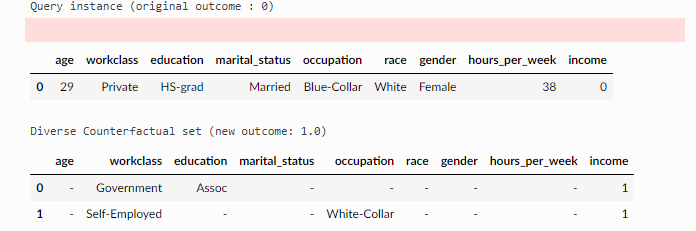

In here, we are looking at a dataframe determining the income class of certain applicants for a loan. The original instance has an outcome of "0", and we are looking to find the combinations of factors to change the appplicant's outcome to 1. The algorithm finds that either a change in `workclass`, `education`, or `occupation` is needed.

Users can also specify if they want only certain columns to be changed, or if there is a permitted range of items for each column.

## QII

For QII (Quantitative Input Influence):
Quantitative Input Influence (QII) is a method for quantifying the impact of each input feature on the model's output. QII can be used to identify which input features are most important to the model's decision, and how changes to those features would impact the output.

QII works by computing the partial derivatives of the model's output with respect to each input feature. These derivatives indicate how sensitive the model's output is to changes in each feature. By computing the absolute values of these derivatives, QII can rank the input features in order of importance, from most to least influential.

Once the input features have been ranked, QII can be used to generate counterfactual explanations that show how changes to specific input features would impact the model's output. These counterfactual explanations can be used to understand the logic behind the model's decision, and to identify potential biases or errors in the model.

For example, if a model is being used to predict loan approvals, QII could be used to identify which input features are most important to the model's decision, such as income, credit score, and employment history. By generating counterfactual explanations that show how changes to these features would impact the model's output, users can better understand how the model is making its decisions, and identify potential biases or errors in the model. 

More info in https://www.andrew.cmu.edu/user/danupam/datta-sen-zick-oakland16.pdf

In [ ]:
if reg:
    # For regression
    # If needed, create a separate preprocessor object
    preprocessor = model['DT'][:-1]
    preprocessor

    # If needed, identify categorical columns that were not dropped
    drop_cols = [] # insert here if needed
    cat_cols = list(set(X_train.select_dtypes(exclude = ['int64', 'float64']).columns.tolist()) - set(drop_cols))


    qii_vals, _ = exp_qii(model['DT'][-1], X_test, idx, preprocessor)
    qii_vals

In [ ]:
if not reg:
    # For classification
    qii_vals, _ = exp_qii(model['DT'][-1], X_test, idx, preprocessor)
    qii_vals

## Dalex

Prepare model explainer: This function creates model adapters: objects with standardized structures that are used by other methods in the package for model exploration and explanations.

**Break Down**: How can your model response be explained by the model's features? What are the most important features of the model? This function is best for why questions, or when you have a moderate number of features. Just be careful when features are correlated.

In [ ]:
exp, obs = dalex_exp(model["DT"], X_train, y_train, X_test, idx)
break_down(exp, obs)

Break-down plots show how the contributions attributed to the individual explanatory variables can change the average model's prediction in order to yield the actual prediction for a single observation (hence local explanation).

The first row (`intercept`) showcases the mean value of the model's predictions for all data. The subsequent rows show the distribution and mean values of the predictions when we fix values to certain explanatory variables. The last row (`prediction`) showcases the prediction for the observation of interest. The green and red bars should indicate positive and negative changes in the mean predictions.

Ideally, you would want the end of your last rows to be in line nearer the prediction. This would mean that the fixed order of the explanatory variables are enough to give a good explanation of what is happening with your particular observation of interest.

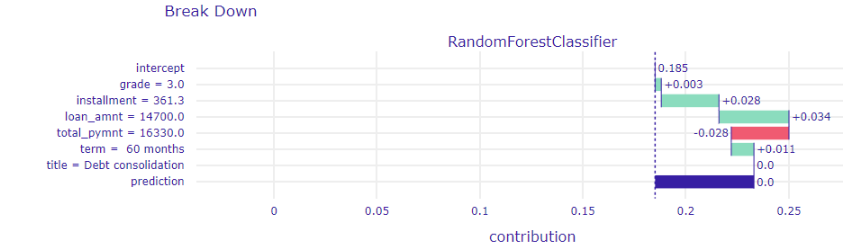

A break-down graph such as the one below may leave a wanting explanation to what is happening with a particular observation of interest.

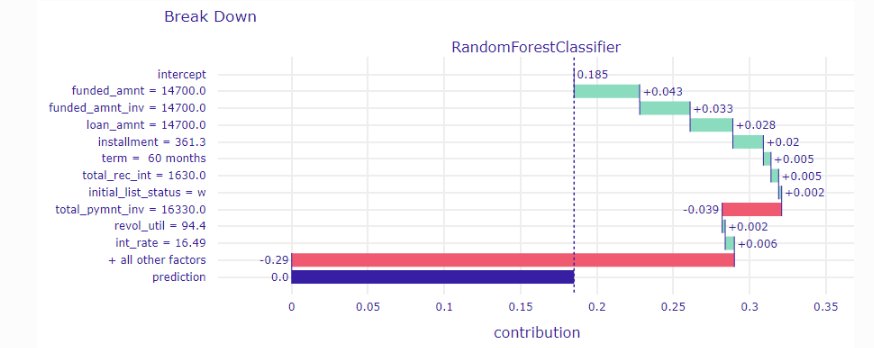

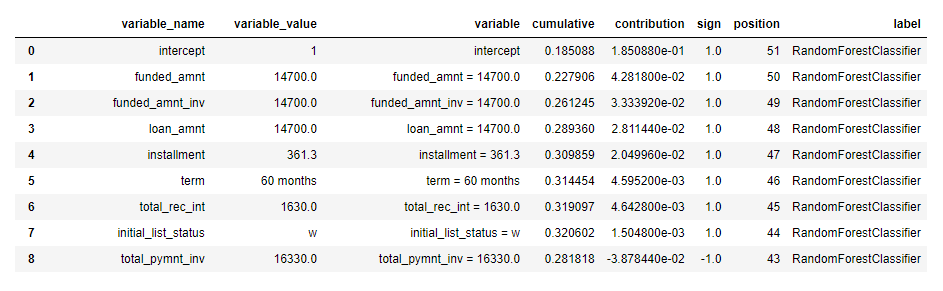

The table that comes with the output is a tabular explanation of the graph. Each row is an explanatory variable found in the data/model, sorted descending contribution (`contribution` in the table) to the explanation. Each `variable_name` is paired with the `variable_value` of the specific point of observation, while `variable` is the concatenation of these two columns. The `cumulative` variable showcases the value starting from the `intercept`, now modified due to the `contribution` of each variable/row. The `sign` column denotes whether the `contribution` is positive or negative.

**Additive**: How does the average model response change when new features are being fixed in the observation of interest? What if we force a specific order of variables?

In [ ]:
# Additive
if reg:
    order = ['LGU', 'security', 'park', 'local_parking', 'smoke_free', 'yard']
elif not reg:
    order = ['grade', 'loan_amnt', 'dti', 'home_ownership', 'purpose']

break_down(exp, obs, order)

**Interactions**: The effects of an explanatory variable depends on the values of other variables. How does that affect the model response? We focus on pairwise interactions.

This may take a while depending on the model and number of variables you have.

In [ ]:
# Interactive

interactive(exp, obs, count = 10) # you can comment this out due to long loading times

Interaction with respect to model explanations posits that the effect or contribution of a single explanatory variable depends on the values of other explanatory variables. To showcase, below is an example of a probability table with the famous *Titanic* dataset, considering two variables: *age* and *class*. Let's look at a simplified version where *age* only has two levels: kids (0-16 years old) and adults (17+ years old). For *class*, let's just consider "2nd class" and "Other".

| Class | Kids (0-16) | Adults (17+) | Total |
| --- | --- | --- | --- |
| 2nd | 11/12 = 91.7%  | 13/166 = 7.8% | 24/178 = 13.5% |
| Other | 2269 = 31.9% | 306/1469 = 20.8% | 328/1538 = 21.3% |
| Total | 33/81 = 40.7% | 319/1635 = 19.5% | 352/1716 = 20.5% |

The overall probability of survival for people in the Titanic is 20.5%, but for passengers from the 2nd class, it is even lower at 13.5%. We can say that the effect of being 2nd class is negative, as it decreased the survival probability by 7%. However, if we look at kids in the 2nd class only, the probability increases by 78.2% to 91.7%. Thus by looking first at *class* then *age*, we can get -7% for *class* and +78.2% for *age*.

However, if you first consider *age*, you could see that the probability for being a kid is higher at 40.7%, increasing by 20.2%. Then for kids, travelling in the 2nd class further increases the probability to 91.7%, increasing by 51%. We can then say that by looking first at *age* then *class*, we can get +20.2% for *age* and +51% for *class*.

Thus, by considering the effects in a different order, we get different contributions attributed to the variables. Looking at the table, we can conclude that the overall effect of the 2nd class in *class* is negative by -7% (decreasing from 20.5% to 13.5%), and that being a kid in *age* has a positive effect of +20.2% (increasing from 20.5% to 40.7%). We can expect a probability of 20.5% - 7% + 20.2% = 33.7% for a kid in 2nd class, but the observed proportion of survivors in that category is higher (91.7%). Thus, we can say that the interaction effect is 91.7% - 33.7% = 58%, an additional effect of the 2nd class specific for kids.

We take advantage of this kind of analysis to showcase these interactions in break-down plots. Below, we can see that the break-down plot does a subpar job of sufficiently explaining the model effect on this particular observation, as all other factors need to account for a 0.29 difference to match the actual prediction.

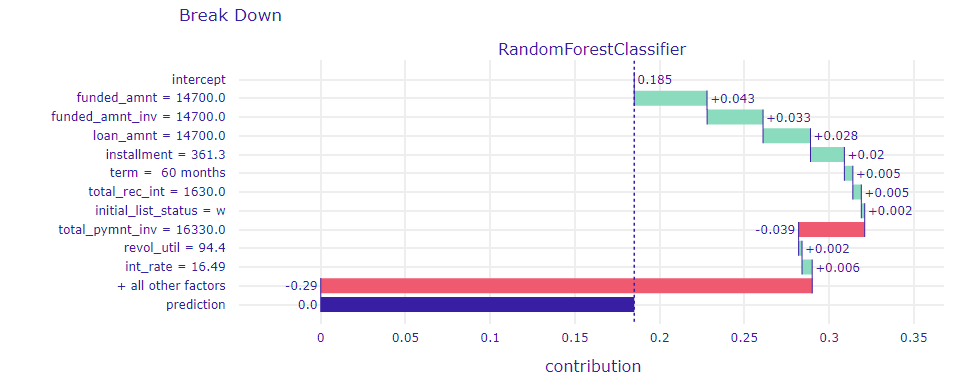

However, if we introduce interactions to the plot, we may see that certain interactions between variables, when looked at together, seem to have a better explanation of the model effect compared to the initial break-down plot.

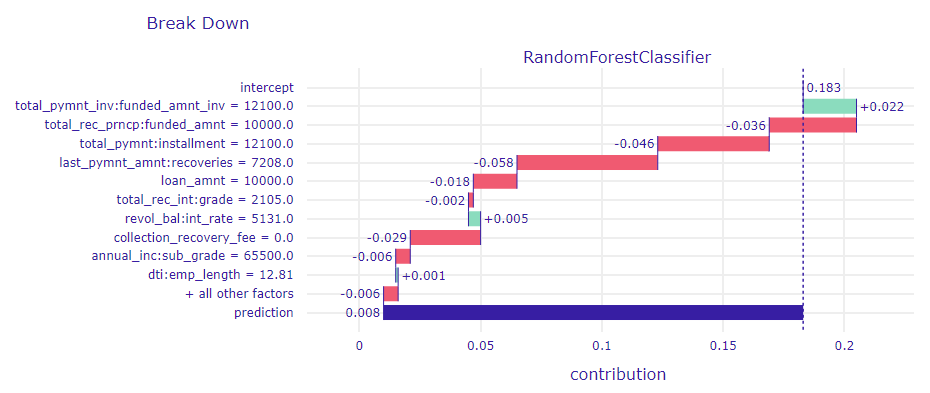

Please note that utilizing interactions is not based on any formal statistical-significance test. Thus, this may lead to false-positive findings especially in small sample sizes.

**Ceteris Paribus**: How would the model response change for a particular observation if only a single feature is changed? This function is best for what if questions. Just be careful when features are correlated.

In [ ]:
# Checking column names
cat_cols, print(X_train.columns.tolist())

In [ ]:
# Ceteris Paribus

# Numerical variables
if reg:
    cp_profile(exp, obs, variables = ['bedrooms', 'floor_area', 'land_size'])
elif not reg:
    cp_profile(exp, obs, variables = ['grade', 'loan_amnt', 'dti'])

In [ ]:
# Categorical variables
if reg:
    cp_profile(exp, obs, variables = ['LGU', 'income_class'], var_type = 'categorical')
elif not reg:
    cp_profile(exp, obs, variables = ['home_ownership', 'purpose'], var_type = 'categorical')

## SHAP

In [ ]:
# You may need to prepare a preprocessor and categorical column names beforehand
# You may need to change model, preprocessor, cat_cols when switching regression and classification use cases
if reg:
    loc_exp, shap_value_loc, feature_names = initiate_shap_loc(X_train, model['DT'][-1], preprocessor)
elif not reg:
    class_names = ['Accepted', 'Rejected']
    loc_exp, shap_value_loc, feature_names = initiate_shap_loc(X_train[:2000], model['DT'][-1], preprocessor)
shap_value_loc

**Waterfall Plot:** The waterfall plot explanation shows features each contributing to push the model output from the base value (the average model output over the training dataset we passed) to the model output. Features pushing the prediction higher are shown in red, those pushing the prediction lower are in blue.

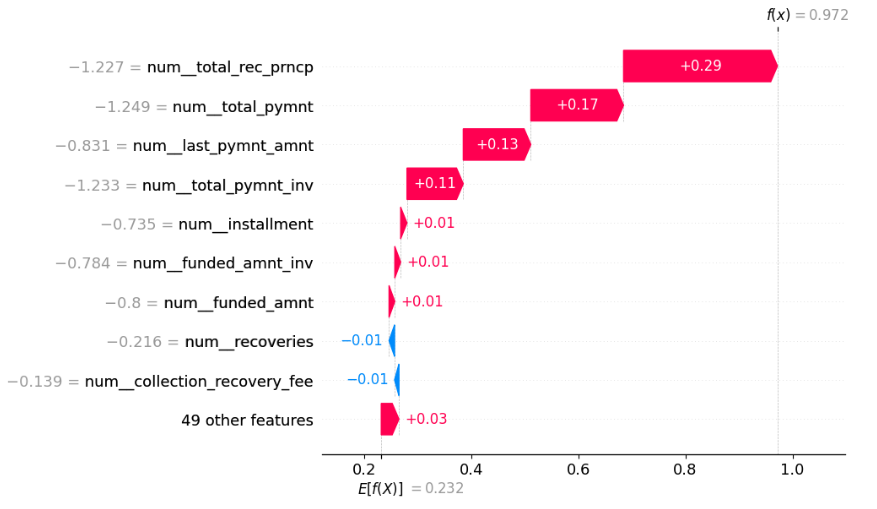

The example above attempts to explain the likelihood of default of a loan applicant. The `f(x)` showcases the probability of the observation to be the "1" class, or in the model's terms, the likelihood to default or have a "Rejected" application. The model's mean predictions are showcased with `E[f(x)]`, a line shooting up from the bottom of the graph. As shown, while the model mostly predicts in the "0" class, or "Accepted" applications, this particular observation has a high probability of rejection, at 0.972. We can see that the main contributors of this likely rejection are the variables `num__total_rec_prncp`, `num__total_pymnt`, and `num__last_pymnt_amnt`, with +0.29, +0.17, and +0.13 respectively.

In [ ]:
# matplotlib.pyplot import issue on shap's end for 0.40.0 and earlier. `show = False` should be fine
if reg:
    shap_waterfall(shap_value_loc, idx, feature_names = feature_names, reg = True)
elif not reg:
    s = shap_waterfall(shap_value_loc, idx, feature_names = feature_names, class_ind = 1, class_names = class_names)
    s

In [ ]:
if not reg:
    shap_waterfall(shap_value_loc, idx, feature_names = feature_names, class_ind = 0, class_names = class_names)

For classification models, we can also specify the likelihood of getting other classes.

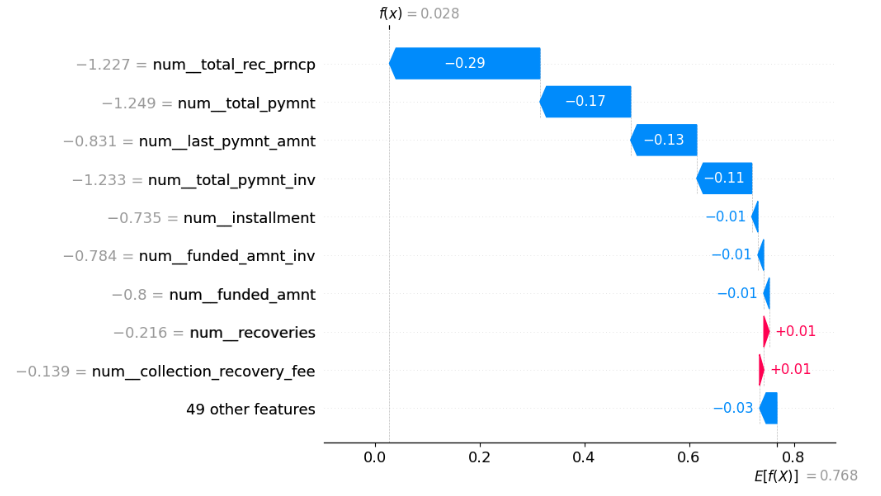

Using the same example as above, we can see that the `f(x)` now pertains to the likelihood to get a "0" class, or an "Accepted" application. Thus, the same observation is highly unlikely to get this class, with a 0.028 or a 1 - 0.972 probability. We can see now that the effects of each explanatory variable are now inversed, with `num__total_rec_prncp` having significant negative (or blue) effects. The `E[f(x)]` value has also flipped due to the binary nature of the model.

**Local Force Plot**: The local force plot attempts to summarize all the individual rows found in a waterfall plot in one continuous, additive "force". As with the previous plot, features pushing the prediction higher are shown in red, those pushing the prediction lower are in blue. 

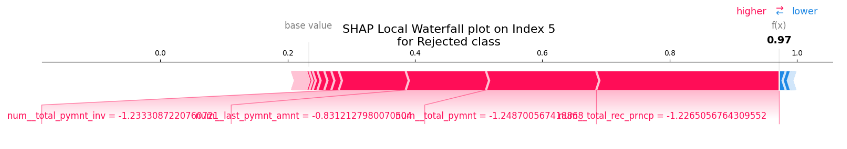

Take for example the plot above, a force plot equivalent of the waterfall plot example shown previously. We know that the `f(x)` of this observation is around 0.97, as shown in bold on the right. We know that the `E[f(x)]`, now written as a `base value` is around 0.23. The force plot conveys that `total_rec_prncp` =-1.2265.. and `total_pymnt` = -1.2487.. contribute the most to that higher probability for this observation. 

In [ ]:
if reg:
    shap_force_loc(shap_value_loc, idx, feature_names, None, None, reg = True)
elif not reg:
    shap_force_loc(shap_value_loc, idx, feature_names, 1, class_names)

Similarly to the waterfall plot, we can explain plots for other classes in classification models.

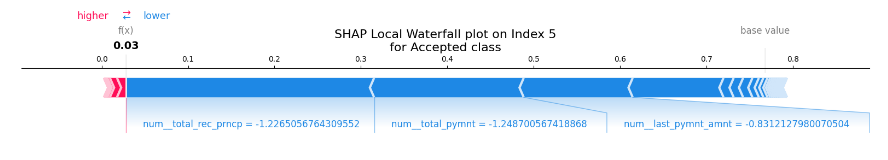

As with before, the `f(x)`, showcasing the likelihood for the observation to be in the "Accepted" class, is now at 0.03; the `base value` also changed accordingly. We still see the main variables `num__total_rec_prncp`, `num__total_pymnt`, and `num__last_pymnt_amnt`, just flipped (as with the color blue).

In [ ]:
if not reg:
    shap_force_loc(shap_value_loc, idx, feature_names, 0, class_names)

**Local Bar Plot**: This is another interpretation of the waterfall and local force plots, brought to you in a double-sided feature importance plot.

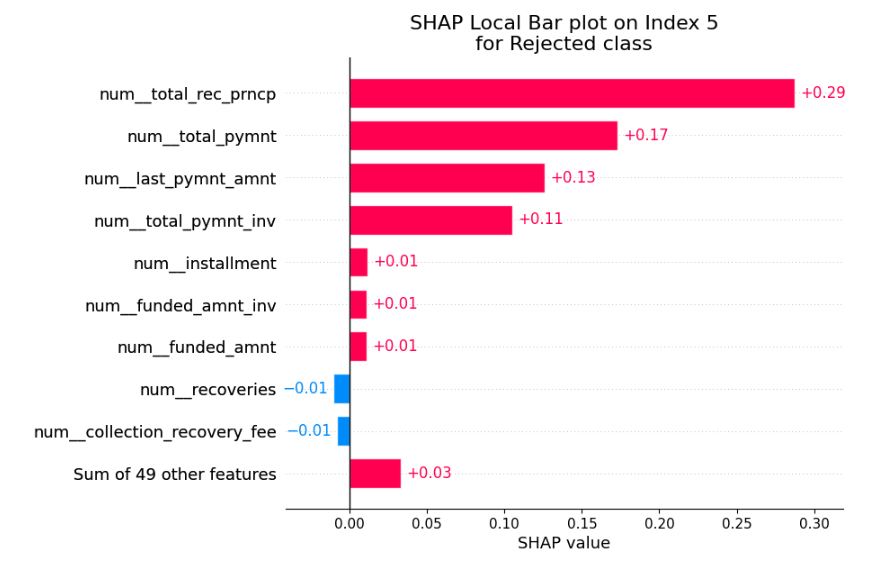

Compared to the first two plots, this does not give an `f(x)` nor `E[f(x)]` indicator. The picture above showcases the same observation, noting that the variables significantly contribute to a higher likelihood of the "Rejected" class. While it does not show the actual values of each variable for that observation, the local bar plot does further emphasize the individual SHAP value contributions.

In [ ]:
if reg:
    shap_bar_loc(shap_value_loc, idx, feature_names, None, None, reg = True)
elif not reg:
    shap_bar_loc(shap_value_loc, idx, feature_names, 1, class_names)

In [ ]:
if not reg:
    shap_bar_loc(shap_value_loc, idx, feature_names, 0, class_names)

# Explanation methods - Global

## Dalex

**Partial-Dependence Plot**: The general idea underlying the construction of PD profiles is to show how does the expected value of model prediction behave as a function of a selected explanatory variable. For a single model, one can construct an overall PD profile by using all observations from a dataset, or several profiles for sub-groups of the observations. Comparison of sub-group-specific profiles may provide important insight into, for instance, the stability of the model’s predictions.

In [ ]:
if reg:
    pd_profile(exp, variables = ['land_size', 'floor_area'])
elif not reg:
    pd_profile(exp, variables = ['annual_inc', 'int_rate'])

The `pd_profile()` function calculates profiles for all continuous variables by default. The table showcases
- `_vname_`: The variable to be profiled
- `_label_`: The name of the model trained and evaluated
- `_x_` and `_yhat_`: The positions of the ceteris paribus line on the graph

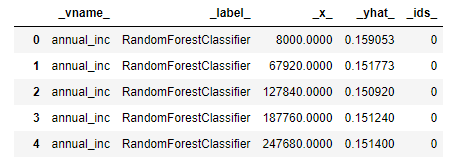

Below is the table's equivalent on a graph.

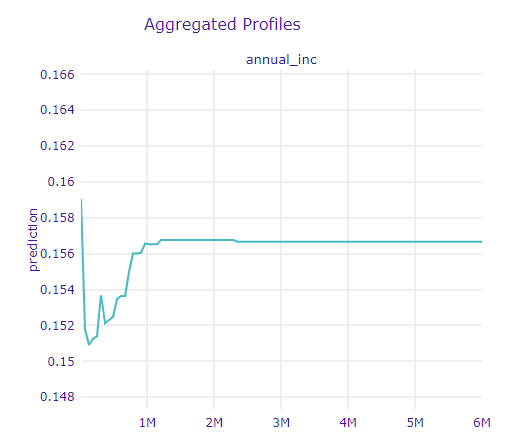

The x-axis gives us the range of values for the specified explanatory variable, while the y-axis tells us the average prediction (intercept) of the model. In this particular example, we can see that below values of 1 million, the average model prediction is set to go lower by around 0.004, before going up again to an average of 0.156.

In [ ]:
# Categorical
if reg:
    pd_profile(exp, var_type = 'categorical', variables = ['LGU', 'income_class'])
elif not reg:
    pd_profile(exp, var_type = 'categorical', variables = ['home_ownership', 'verification_status'])

We can obtain profiles for categorical variables by specifying the `variable_type` to be `categorical`, and calling categorical variables to the `.plot()` function.

The table created by calling the `.result` function showcases summarized results of all categories under each categorical variable:

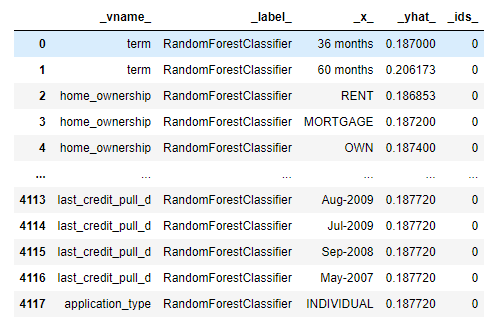

We see each categorical variable in the `_vname_` column, with specific categories under `_x_`. We are also given a `_yhat_` column which showcases the mean predictions of that variable-category combination in the model.

The equivalent plot is shown below:

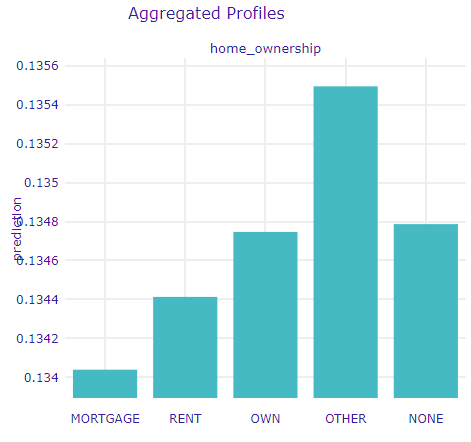

Notice that the graphs vary from the numerical model profiles, as we aren't looking at continuous variables anymore. Each bar represents a category within that explanatory variable, and showcases its difference for average predictions. Above, we can see that `MORTGAGE`-based home ownerships generally have less probability of default compared to those who `OWN`, have `NONE`, or have `OTHER` means of home ownerships. 

In [ ]:
# Grouped partial-dependence profiles
if reg:
    pd_profile(exp, groups = 'LGU', variables = ['land_size', 'floor_area'])
elif not reg:
    pd_profile(exp, groups = 'home_ownership', variables = ['annual_inc', 'int_rate'])

We can also split the output of the model into a group defined by the categories of an explanatory variable. We utilize the `groups` argument and specify a categorical variable, with which the the table and graphs add an additional label. In the image below, we can see that there are different `_label_` outputs, which specify the different categories within the group of `home_ownership`.

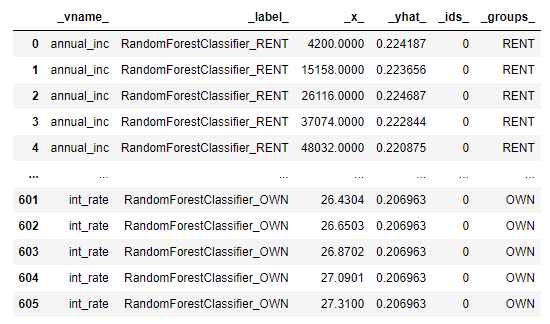

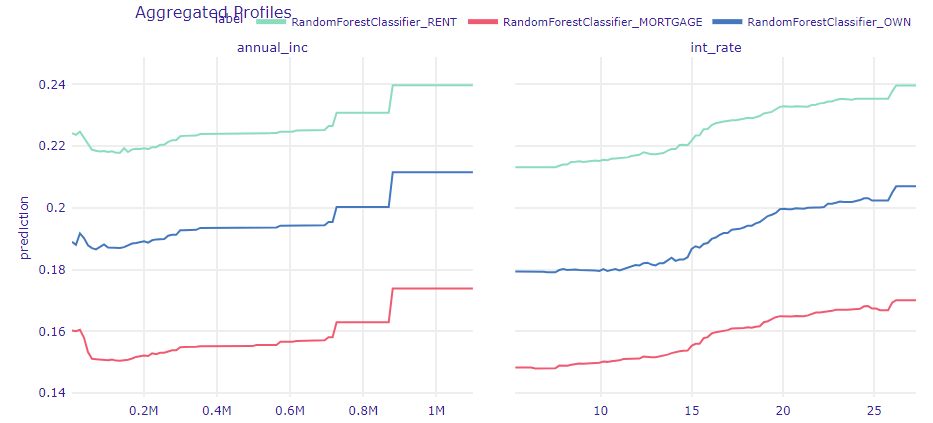

In the graph equivalent, we can see three lines in each graph, specifying the distribution of mean predictions across each numerical variable according to the categories of the grouped variable. 

*Warning*: This function is not flexible against many categories nor numerical variables in terms of layout, so expect some unfavorable graphs if you try some combinations.

**Variable-importance**: How important is an explanatory variable? We can use this for
- Model simplification: excluding variables that do not influence a model's predictions
- Model exploration: comparing variables' importance in different models may help in discovering interrelations between variables
- Domain-knowledge-based model validation: identification of most important variables may be helpful in assessing the validity of the model based on domain knowledge
- Knowledge generation: identification of important variables may lead to discovery of new factors involved in a particular mechanism

In [ ]:
# Variable-importance Measures
var_imp(exp, loss_function = 'mae')

If we remove certain explanatory variables from a model, by how much will the model performance change? This is what these sets of functions aim to showcase, by implementing a permutation-based approach to measuring the importance of an explanatory variable. By default, the function performs on 10 permutations calculated on a maximum of 1000 observations; this can be set manually.

The table below showcases a summary of the drop-out loss from each variable if they were removed from the model. In the example above, it displays that if the `total_rec_prncp` variable was removed from the model, the model would incur an additional drop-out loss of around +0.004.

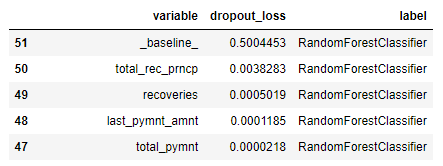

The equivalent graph showcases the variable importance in descending order. As seen in the table, we have `total_rec_prncp` as the most important variable, with `recoveries` and `last_pymnt_amnt` as slightly important as well. However, we can see that the rest of the variables has relatively little impact on the drop-out loss of the model. This seems to suggest that the RandomForestClassifier is quite reliant only on 3-4 main variables. This can be good or bad depending on the data availability and accuracy of the model. 

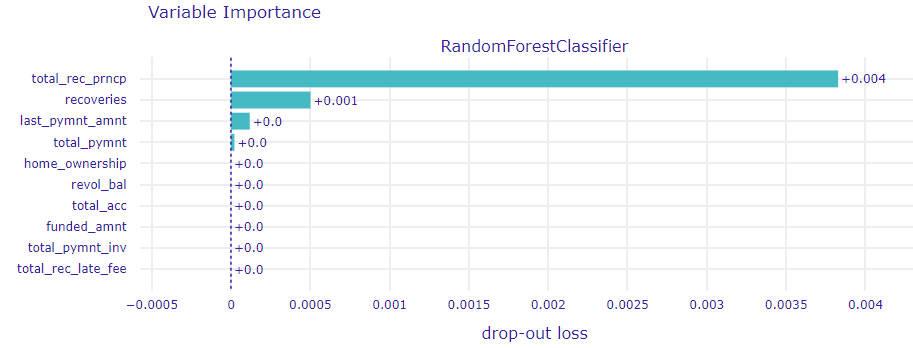

In [ ]:
# Grouped variable-importance measures
if reg:
    var_imp(exp, groups = {
        'cmci': ['infrastructure', 'resiliency', 'productivity', 'security', 'transparency', 'utilities'],
        'house_amenities': [ 'ac_unit', 'balcony', 'deck', 'fence', 'fireplace', 'fitness_center', 'garage',
                            'grass', 'library_books', 'local_airport', 'local_parking', 'meeting_room', 'park',
                            'pool', 'security.1', 'smoke_free', 'sports_basketball', 'sports_tennis',
                            'sports_volleyball', 'warehouse', 'yard'],
        'house_characteristics': ['price_conditions', 'car_spaces', 'bedrooms', 'bathrooms', 'floor_area', 'land_size'],
        'LOI_1000': ['cafe_1000', 'fast_food_1000', 'pub_1000', 'restaurant_1000', 'college_1000', 'kindergarten_1000',
                     'school_1000', 'university_1000', 'fuel_1000', 'parking_1000', 'atm_1000', 'bank_1000', 'clinic_1000',
                     'hospital_1000', 'pharmacy_1000', 'police_1000', 'townhall_1000', 'marketplace_1000', 'hotel_1000',
                     'residential_1000', 'commercial_1000', 'industrial_1000', 'retail_1000', 'supermarket_1000',
                     'fire_station_1000', 'government_1000'],
        'LOI_3000': ['cafe_3000', 'fast_food_3000', 'pub_3000', 'restaurant_3000', 'college_3000', 'kindergarten_3000',
                     'school_3000', 'university_3000', 'fuel_3000', 'parking_3000', 'atm_3000', 'bank_3000', 'clinic_3000',
                     'hospital_3000', 'pharmacy_3000', 'police_3000', 'townhall_3000', 'marketplace_3000', 'hotel_3000',
                     'residential_3000', 'commercial_3000', 'industrial_3000', 'retail_3000', 'supermarket_3000',
                     'fire_station_3000', 'government_3000'],
        'LOI_5000': ['cafe_5000', 'fast_food_5000', 'pub_5000', 'restaurant_5000', 'college_5000', 'kindergarten_5000',
                     'school_5000', 'university_5000', 'fuel_5000', 'parking_5000', 'atm_5000', 'bank_5000', 'clinic_5000',
                     'hospital_5000', 'pharmacy_5000', 'police_5000', 'townhall_5000', 'marketplace_5000', 'hotel_5000',
                     'residential_5000', 'commercial_5000', 'industrial_5000', 'retail_5000', 'supermarket_5000',
                     'fire_station_5000', 'government_5000'],
        'socio-economic': ['LGU', 'poverty_inc', 'subs_inc', 'lgu_type', 'income_class', 'anreg_income_2021',
                           'capex_2021', 'socex_2021', 'pop_2022', 'growth_5years', 'growth_10years']
    }, loss_function = 'mae')
elif not reg:
    var_imp(exp, groups = {
        'total': ['total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
                 'total_rec_int', 'total_rec_late_fee', 'total_rev_hi_lim'],
        'amount': ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'last_pymnt_amnt'],
        'categorical': X_train.select_dtypes(exclude = ['int64', 'float64']).columns.tolist()
    }, loss_function = 'mae')

At times, variables are grouped together to see their contribution or influence to the model as a whole. This can be replicated by adding a dictionary to the `variable_groups` parameter. In the dictionary we specify the key as the name of the group, and the value as a list containing the names of the variable in this group. 

We can now output a shorter table with only the grouped variables considered and their respective drop-out losses. 

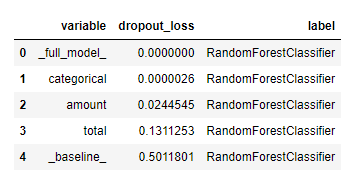

The equivalent graph will also only showcases these variables. As seen in the table, the drop-out loss for the grouped `categorical` variable is insignificant, thus barely shows in the graph.

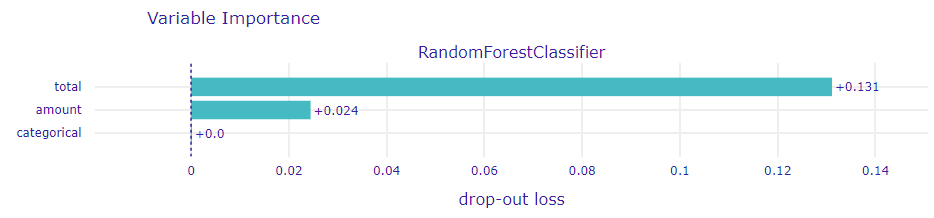

*Warning:* Technically, an explanatory variable may be put into more than one group by the user. This will still output a table and graph, but will be misleading as the same variables shouldn't appear twice on the model. By default, the function does not also make another "group" composing of the remaining unnamed explanatory variables, so please be careful when extracting conclusions from this portion.

While partial-dependence profiles are easy to explain, they may be misleading if certain explanatory variables are correlated, which is the case for many models. For example, one might expect in a *property valuation* dataset that the `floor_area` and `number_of_bedrooms` may be positively correlated, as usually larger houses would be able to take in more people. Thus, we present two explanation methods which mitigate this effect:
- **Local-dependence profiles**: On a model, the LD is defined as an expected value of predictions (or CP profiles) over a conditional distribution (the distribution of a certain explanatory variable). This conditional, or marginal, distribution is essentially some smaller part of the entire distribution, as if we had a regression tree dividing our distribution into defined parts.
- **Accumulated-local profiles**: This method averages the changes in the predictions, instead of the predictions themselves, and accumulates them over a grid. It does this by describing the local change of the model due to an explanatory variable, and averaging it over the explanatory variable's distribution. This ensures that the method is stable even with models containing highly correlated variables.

The visualization below showcases the differences between ceteris-paribus profiles (CP), partial-dependence profiles (PD), local-dependence profiles (LD), and accumulated-local profiles (AL).

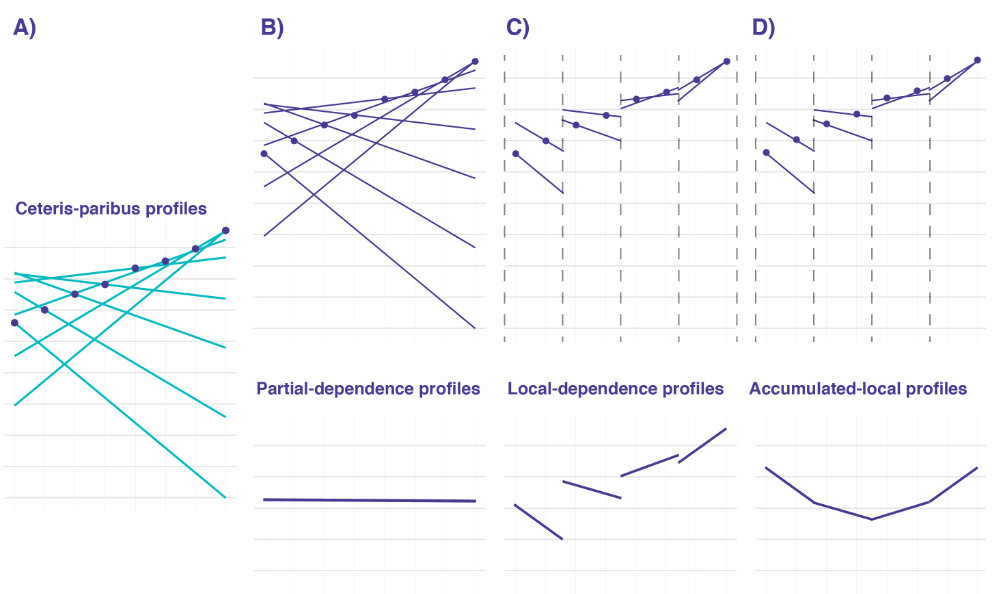

In [ ]:
# Local Dependence
if reg:
    variables = ['floor_area', 'land_size']
elif not reg:
    ld_profile(exp, variables = ['annual_inc', 'int_rate'])

In [ ]:
# Accumulated-Local
if reg:
    al_profile(exp, variables = ['floor_area', 'land_size'])
elif not reg:
    al_profile(exp, variables = ['annual_inc', 'int_rate'])

In [ ]:
# Compare profiles
if reg:
    compare_profiles(exp, variables = ['floor_area', 'land_size'])
elif not reg:
    compare_profiles(exp, variables = ['annual_inc', 'int_rate'])

To visualize the differences between the three proposed methods, we can plot all three in the same graph output. As shown below, we have two graphs describing the explanatory variables `annual_inc` and `int_rate` over three types of profiling methods. We see that the PD and AL profiles have slightly differing distributions, while the LD profile has a lower and decreasing distribution for `annual_inc`, and steadily increasing distribution for `int_rate`.

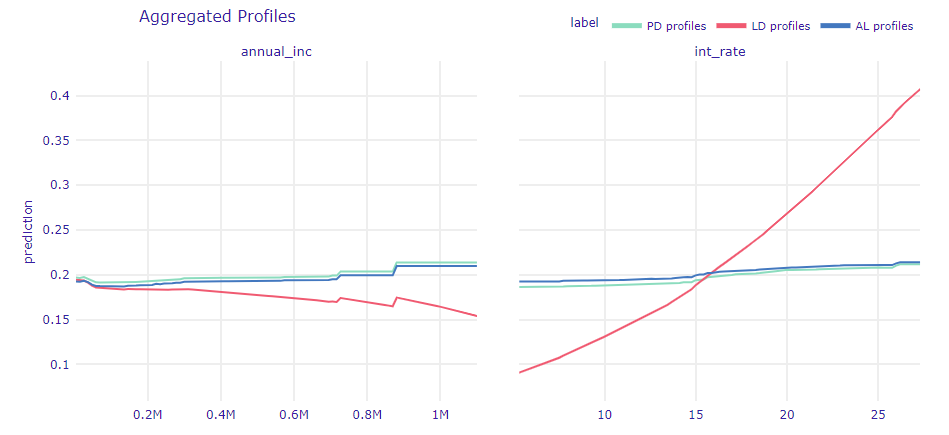

Note each of these three plots only suggest potential influence of explanatory variables to model output. It is a good practice to showcase these three plots together when trying to determine whether a certain explanatory variable indeed has a signficant influence. Case in point, if we only saw the LD profile of `int_rate`, we might have concluded that the variable has a positively correlating effect mean prediction. Only by comparing it with its PD and AL profiles can we see that this influence may be exaggerated. 

## SHAP

In [ ]:
if reg:
    exp_glob, shap_values_glob, feature_names = initiate_shap_glob(X_train, model['DT'][-1], preprocessor, cat_cols)
elif not reg:
    exp_glob, shap_values_glob, feature_names = initiate_shap_glob(X_train, model['DT'][-1], preprocessor, cat_cols)
shap_values_glob

In [ ]:
# You may need to define a preprocessed object
X_train_proc = preprocessor.transform(X_train)
X_train_proc

**Bar Plot**: This takes the average of the SHAP value magnitudes across the dataset and plots it as a simple bar chart.

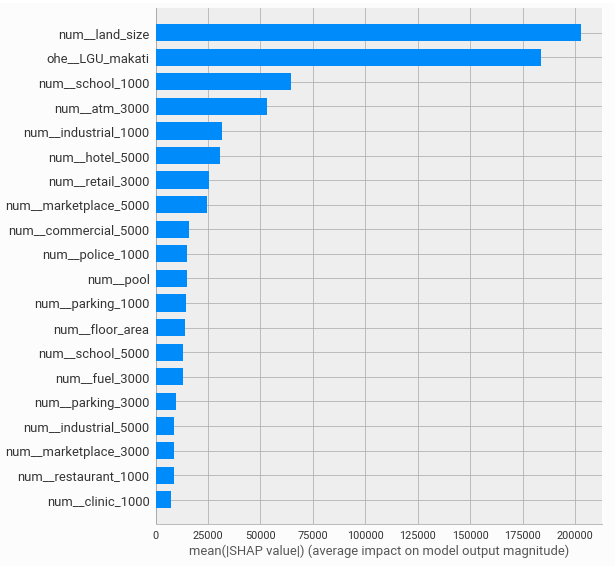

This also takes into account the preprocessed versions of your columns, hence the naming of the features.

In [ ]:
if reg:
    shap_bar_glob(shap_values_glob, X_train_proc, feature_names = feature_names, class_ind = None, class_names = None, reg = True)
elif not reg:
    shap_bar_glob(shap_values_glob, X_train_proc, feature_names = feature_names, class_ind = 0, class_names = class_names, reg = False)


**SHAP Summary Plot**: Rather than use a typical feature importance bar chart, we use a density scatter plot of SHAP values for each feature to identify how much impact each feature has on the model output for individuals in the validation dataset. Features are sorted by the sum of the SHAP value magnitudes across all samples. It is interesting to note that the relationship feature has more total model impact than the captial gain feature, but for those samples where capital gain matters it has more impact than age. In other words, capital gain effects a few predictions by a large amount, while age effects all predictions by a smaller amount.

Note that when the scatter points don’t fit on a line they pile up to show density, and the color of each point represents the feature value of that individual.

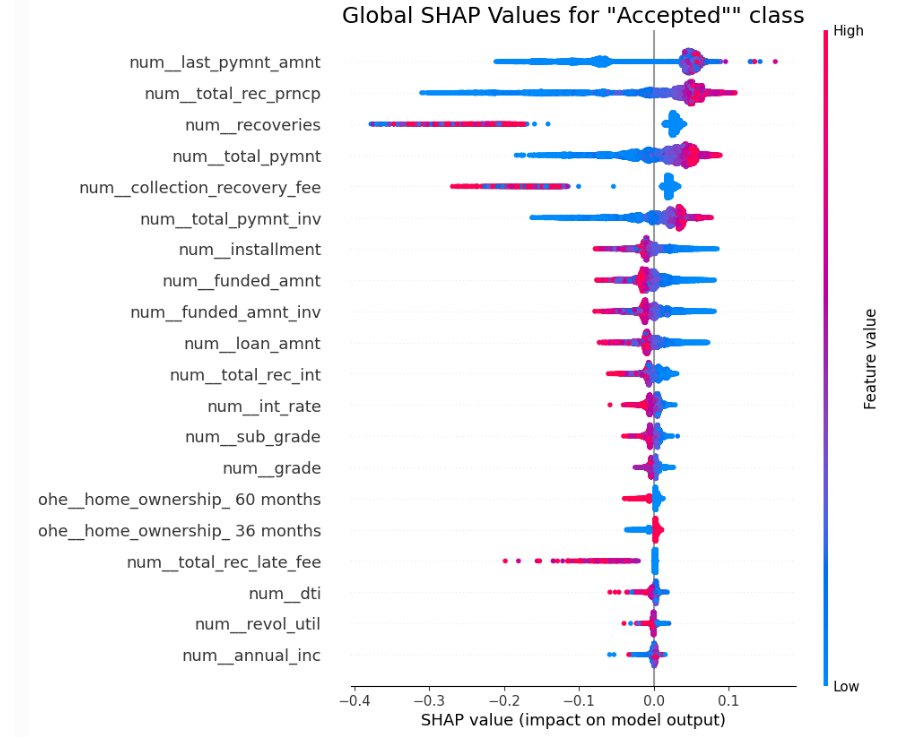

The color represents the feature value (<font color = 'red'>red for **high**</font>, <font color = 'blue'> blue for *low*</font>). In the example above, the plot reveals that low values of `num__last_pymnt_amnt` mostly have contribute to 0 or "Accepted" class. In `num_recoveries`, high values (or applicants with high amounts of recoveries) tend to have "Accepted" class as well, and some low values (applicants with low amounts of recoveries) have a slight positive contribution to the model (or may be in the "Rejected" class).

In [ ]:
if reg:
    s = shap_summary(shap_values_glob, X_train_proc, feature_names = feature_names, class_ind = None, class_names = None, reg = True)
elif not reg:
    s = shap_summary(shap_values_glob, X_train_proc, feature_names = feature_names, class_ind = 0, class_names = class_names)
s

**Dependence Plot:** We can also run a plot for SHAP interaction values to observe its main effects and interaction effects with other variables. We can look at it in two ways: 1) by comparing the original variable to its SHAP values, and 2) by directly looking at another variable. Note that we may have to specify the class of the target variable if we are working with a classification model, as seen below.

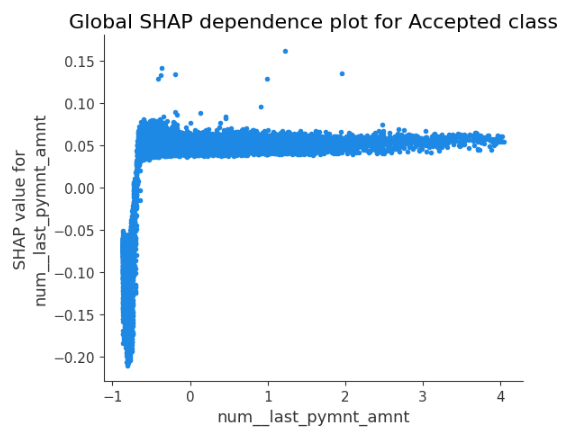

In this example above, we look at the dependence plot between `num__last_pymnt_amnt` and its SHAP values. We can see that the SHAP value mostly stays at around 0.05 for values [0, 4), except at ranges [-1, 0], where the SHAP value increases from -0.20 to 0.05.

In [ ]:
# Check feature names
print(feature_names)

In [ ]:
shap.initjs()

if reg:
    s = shap_dependence(shap_values_glob, X_train_proc, 'num__floor_area', feature_names = feature_names, class_ind = None, class_names = None,
                    int_ind = 'num__land_size', reg = True)
elif not reg:
    s = shap_dependence(shap_values_glob, X_train_proc, 'num__last_pymnt_amnt', feature_names = feature_names, class_ind = 0,
                    class_names = class_names, int_ind = 'num__recoveries')
s

If we add a specific interaction index (i.e. another column from the X dataset), we can get a slightly different graph:

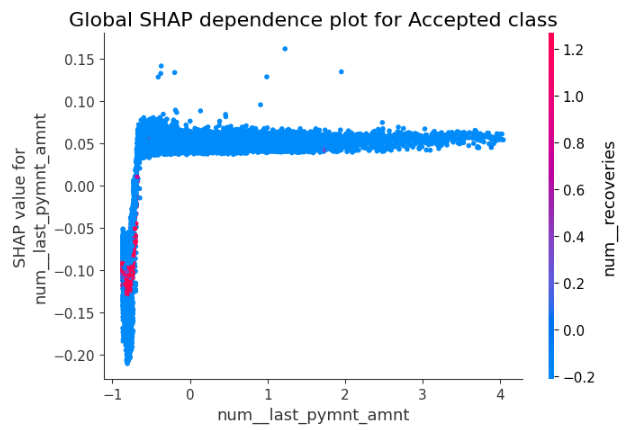

The difference in colors showcases the normalized ranges of `num_recoveries`. We can see that the high values of `num_recoveries` mostly come at the [-1, 0] range of `num__last_pymnt_amnt`, thus is not affected nor correlated significantly.

**Force Plot**: Another way to visualize the same explanation is to use a force plot. If we take many local force plot explanations, rotate them 90 degrees, and then stack them horizontally, we can see explanations for an entire dataset.

Note that this graph is interactive.

In [ ]:
shap.initjs()

if reg:
    s = shap_force_glob(exp_glob, shap_values_glob, X_train_proc, feature_names = feature_names, reg = True)
elif not reg:
    s = shap_force_glob(exp_glob, shap_values_glob, X_train_proc, feature_names = feature_names, class_ind = 0, class_names = class_names)
s

# Stability

Compares the distribution of the target variable in the test dataset to a training data set that was used to develop the model

## Population Stability Index (PSI)

In [ ]:
psi_list(X_train[cont], X_test[cont])

## Kolgomorov-Smirnov (K-S) Test
The K-S test is a nonparametric test that compares the cumulative distributions of two data sets, in this case, the training data and the post-training data. 
The null hypothesis for this test states that the data distributions from both the datasets are same. If the null is rejected then we can conclude that there is a drift in the data.

In [ ]:
if reg:
    ks_df, a = ks(X_train, X_test)
elif not reg:
    ks_df, a = ks(pd.DataFrame(preprocessor.transform(X_train), columns = preprocessor.get_feature_names_out()),
                  pd.DataFrame(preprocessor.transform(X_test), columns = preprocessor.get_feature_names_out()))
ks_df

## Evidently

In [ ]:
if reg:
    X = pd.concat([X_train, X_test])
    y = pd.concat([y_train, y_test])
    
    df = pd.concat([X, y], axis = 1)
    df.head()

In [ ]:
# Regression example
if reg:
    cur = df.iloc[:9000,:]
    ref = df.iloc[9000:,:]
    
    cur['prediction'] = model['DT'].predict(cur.drop(target_feature, axis = 1))
    ref['prediction'] = model['DT'].predict(ref.drop(target_feature, axis = 1))
    
    column_mapping = ColumnMapping()
    column_mapping.target = 'price_sqm'
    column_mapping.id = None
    column_mapping.datetime_features = None

# Classification example
if not reg:
    # cur = df.iloc[:40000,:]
    # ref = df.iloc[40000:,:]
    cur = train_data.copy()
    ref = test_data.copy()

    target_feature = target[0]

    cur['prediction'] = model['DT'].predict(cur.drop(target, axis = 1))
    ref['prediction'] = model['DT'].predict(ref.drop(target, axis = 1))

    column_mapping = ColumnMapping()
    column_mapping.target = 'loan_status'
    column_mapping.id = 'id'
    column_mapping.datetime_features = ['issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

In [ ]:
current_data, reference_data, column_mapping = mapping_columns(test_data,train_data, model['DT'], target_feature)

### Data Drift
You can detect and analyze changes in the input feature distributions.
1. To monitor the model performance without ground truth. When you do not have true labels or actuals, you can monitor the feature drift to check if the model operates in a familiar environment. You can combine it with the Prediction Drift. If you detect drift, you can trigger labeling and retraining, or decide to pause and switch to a different decision method.
2. When you are debugging the model quality decay. If you observe a drop in the model quality, you can evaluate Data Drift to explore the change in the feature patterns, e.g., to understand the change in the environment or discover the appearance of a new segment.
3. To understand model drift in an offline environment. You can explore the historical data drift to understand past changes in the input data and define the optimal drift detection approach and retraining strategy.
4. To decide on the model retraining. Before feeding fresh data into the model, you might want to verify whether it even makes sense. If there is no data drift, the environment is stable, and retraining might not be necessary.

In [ ]:
data_drift_report, ddf = data_drift_dataset_report(current_data,reference_data,column_mapping=column_mapping)

In [ ]:
data_drift_report.show(mode='inline')

In [ ]:
data_drift_report.save_html(f'assets/data_drift_report.html')

In [ ]:
if reg:
    col = 'land_size'
elif not reg:
    col = 'loan_amnt'
data_drift_report_col, ddf = data_drift_column_report(current_data,reference_data,col)
data_drift_report_col.show(mode='inline')

In [ ]:
data_drift_report_col.save_html(f'assets/data_drift_report_col.html')

In [ ]:
data_drift_test, ddt = data_drift_dataset_test(current_data,reference_data,column_mapping=column_mapping)
data_drift_test.show(mode='inline')

In [ ]:
data_drift_test.save_html(f'assets/data_drift_test.html')

In [ ]:
data_drift_test_col, ddt = data_drift_column_test(current_data,reference_data,col)
data_drift_test_col.show(mode='inline')

In [ ]:
data_drift_test_col.save_html(f'assets/data_drift_test_col.html')

### Data Quality
You can explore and track various dataset and feature statistics.
1. Data quality tests in production. You can check the quality and stability of the input data before you generate the predictions, every time you perform a certain transformation, add a new data source, etc.
2. Data profiling in production. You can log and store JSON snapshots of your production data stats for future analysis and visualization.
3. Exploratory data analysis. You can use the visual report to explore your training dataset and understand which features are stable and useful enough to use in modeling.
4. Dataset comparison. You can use the report to compare two datasets to confirm similarities or understand the differences. For example, you might compare training and test dataset, subgroups in the same dataset (e.g., customers from Region 1 and Region 2), or current production data against training.
5. Production model debugging. If your model is underperforming, you can use this report to explore and interpret the details of changes in the input data or debug the quality issues.

In [ ]:
data_quality_report, dqr = data_quality_dataset_report(current_data,reference_data,column_mapping=column_mapping)
data_quality_report.show(mode='inline')

In [ ]:
data_quality_report.save_html(f'assets/data_quality_report.html')

In [ ]:
data_quality_report_col, _ = data_quality_column_report(current_data,reference_data,col)
data_quality_report_col.show(mode='inline')

In [ ]:
data_quality_report_col.save_html(f'assets/data_quality_report_col.html')

In [ ]:
data_quality_test, dqt = data_quality_dataset_test(current_data,reference_data,column_mapping=column_mapping)
data_quality_test.show(mode='inline')

In [ ]:
data_quality_test.save_html(f'assets/data_quality_test.html')

In [ ]:
data_quality_test_col, dqt = data_quality_column_test(current_data,reference_data,col)
data_quality_test_col.show(mode='inline')

In [ ]:
data_quality_test_col.save_html(f'assets/data_quality_test_col.html')

### Target Drift
You can detect and explore changes in the target function (prediction) and detect distribution drift.
1. To monitor the model performance without ground truth. When you do not have true labels or actuals, you can monitor Prediction Drift to react to meaningful changes. For example, to detect when there is a distribution shift in predicted values, probabilities, or classes. You can often combine it with the Data Drift analysis.
2. When you are debugging the model decay. If you observe a drop in performance, you can evaluate Target Drift to see how the behavior of the target changed and explore the shift in the relationship between the features and prediction (target).
3. Before model retraining. Before feeding fresh data into the model, you might want to verify whether it even makes sense. If there is no target drift and no data drift, the retraining might not be necessary.

In [ ]:
target_drift_report, tdr = target_drift_report(current_data,reference_data,column_mapping=column_mapping)
target_drift_report.show(mode='inline')

In [ ]:
target_drift_report.save_html(f'assets/target_drift_report.html')

### Regression Performance

In [ ]:
if reg:
    regression_report, rpr = regression_performance_report(current_data,reference_data,column_mapping=column_mapping)
    regression_report.show(mode='inline')

In [ ]:
if reg:
    regression_report.save_html(f'assets/regression_report.html')

In [ ]:
if reg:
    approx_val = {
        'mae': 30,
        'rmse': 4.5,
        'me': 15,
        'mape': 0.2,
        'ame': 50,
        'r2': 0.75
    }
    regression_test, rpt = regression_performance_test(current_data,reference_data,column_mapping=column_mapping, approx_val = approx_val)
    regression_test.show(mode='inline')

In [ ]:
if reg:
    regression_test.save_html(f'assets/regression_test.html')

### Classification Performance

In [ ]:
if not reg:
    classification_report, cpr = classification_performance_report(current_data,reference_data,column_mapping=column_mapping)
    classification_report.show(mode='inline')

In [ ]:
if not reg:
    classification_report.save_html(f'assets/classification_report.html')

In [ ]:
if not reg:
    # SAMPLE DICTIONARY
    approx_val = {
        'mae': 30,
        'rmse': 4.5,
        'me': 15,
        'mape': 0.2,
        'ame': 50,
        'r2': 0.75
    }
    classification_test, cpt = classification_performance_test(current_data,reference_data,column_mapping=column_mapping, approx_val = None)
    classification_test

In [ ]:
if not reg:
    classification_test.save_html(f'assets/classification_test.html')

## Alibi Detect

In [ ]:
if not reg:
    # Classification
    X_train2, X_ref2, y_train2, y_ref2 = train_test_split(X_test, y_test, train_size=0.5, random_state=42)
    X_ref2, X_test2, y_ref2, y_test2 = train_test_split(X_ref2, y_ref2, train_size=0.5, random_state=42)

    # Check if model gives good accuracy
    print('Training accuracy: ', model['DT'].score(X_train2, y_train2))
    print('Test accuracy: ', model['DT'].score(X_test2, y_test2))

if reg:
    # Regression
    X = pd.concat([X_train, X_test])
    y = pd.concat([y_train, y_test])
    display(X.shape, y.shape)

    X_train2, X_ref2, y_train2, y_ref2 = train_test_split(X, y, train_size=0.5, random_state=42)
    X_ref2, X_test2, y_ref2, y_test2 = train_test_split(X_ref2, y_ref2, train_size=0.5, random_state=42)
    
    print(model['DT'].score(X_train2, y_train2))
    print('Training RMS error = %.3f' % np.sqrt(np.mean((model['DT'].predict(X_train2)-y_train2)**2)))
    print(model['DT'].score(X_test2, y_test2))
    print('Test RMS error = %.3f' % np.sqrt(np.mean((model['DT'].predict(X_test2)-y_test2)**2)))

### Cramer-von-Mises

In [ ]:
if reg:
    # Shift data by adding Gaussian noise
    X_concept = X_test2.copy()
    y_concept = model['DT'].predict(X_concept) * 1.5 + np.random.normal(1, 10, size = len(y_test2))
    
    # Covariate drift should lead to degredation in model accuracy
    print(model['DT'].score(X_concept, y_concept))
    print('Test (Concept) RMS error = %.3f' % np.sqrt(np.mean((model['DT'].predict(X_concept)-y_concept)**2)))

if not reg:
    # Shift data by adding artificially adding drift to X_test
    X_covar, y_covar = X_test2.copy(), y_test2.copy()
    X_concept, y_concept = X_test2.copy(), y_test2.copy()

    # Apply covariate drift by altering some data in x (manual altering)
    idx1 = y_test2[y_test2 == 1].index
    X_covar.loc[idx1, 'last_pymnt_amnt'] += 10000

    # Apply concept drift by switching two species
    idx2 = y_test2[y_test2 == 0].index
    y_concept[idx1] = 0
    y_concept[idx2] = 1

    Xs = {'No drift': preprocessor.transform(X_test2), 'Covariate drift': preprocessor.transform(X_covar), 'Concept drift': preprocessor.transform(X_concept)}
    # Xs

    print('Reference data:', model['DT'].score(X_ref2, y_ref2))
    print('Reference data:', model['DT'].score(X_test2, y_test2))
    print('Reference data:', model['DT'].score(X_covar, y_covar))
    print('Reference data:', model['DT'].score(X_concept, y_concept))

In [ ]:
if reg:
    # Supervised drift detection
    lossr_ref = (model['DT'].predict(X_ref2) - y_ref2) ** 2
    lossr_test = (model['DT'].predict(X_test2) - y_test2) ** 2
    lossr_concept = (model['DT'].predict(X_concept) - y_concept) ** 2
    
    lossesr = {'No drift': lossr_test.to_numpy(), 'Concept drift': lossr_concept}

    cramer_von_mises(lossr_ref, lossesr)

if not reg:
    # Supervised drift detection
    # Compute for model indicators
    loss_ref = (model['DT'].predict(X_ref2) == y_ref2).astype(int)
    loss_test = (model['DT'].predict(X_test2) == y_test2).astype(int)
    loss_covar = (model['DT'].predict(X_covar) == y_covar).astype(int)
    loss_concept = (model['DT'].predict(X_concept) == y_concept).astype(int)
    losses = {'No drift': loss_test, 'Covariate drift': loss_covar, 'Concept drift': loss_concept}

    print(loss_ref)

    cramer_von_mises(loss_ref, losses)

### Fisher's Exact Test

In [ ]:
if not reg:
    fishers_exact_test(loss_ref, losses)

### Tabular Drift

In [ ]:
if reg:
    tabular_drift(X_train2, X_ref2)
elif not reg:
    tabular_drift(X_train2, X_ref2, preprocessor)

### Chi-Squared

In [ ]:
preprocessor.get_feature_names_out()

In [ ]:
pd.DataFrame(preprocessor.transform(X_train), columns = preprocessor.get_feature_names_out())

In [ ]:
if reg:
    chi_sq(X_train2, X_test2)
elif not reg:
    chi_sq(pd.DataFrame(preprocessor.transform(X_train), columns = preprocessor.get_feature_names_out()),
           pd.DataFrame(preprocessor.transform(X_test), columns = preprocessor.get_feature_names_out()))

# Decile Analysis
For classification use cases only.

In [ ]:
if not reg:
    predict_train = pd.Series(model['DT'].predict_proba(X_train)[:, 1], index = train_data.index)
    predict_test = pd.Series(model['DT'].predict_proba(X_test)[:, 1], index = test_data.index)

    train_data['prob'] = predict_train
    test_data['prob'] = predict_test

In [ ]:
if not reg:
    dc, ks = decile_table(train_data['loan_status'], train_data['prob'])
    dc

In [ ]:
if not reg:
    fig1 = model_selection_by_gain_chart({'DT': dc})
    fig2 = model_selection_by_lift_chart({'DT': dc})
    fig3 = model_selection_by_lift_decile_chart({'DT': dc})
    fig4 = model_selection_by_ks_statistic({'DT': dc})

# Robustness

In [ ]:
from robustness.art_extra_models import *
from robustness.art_metrics import *
from robustness.art_mia import *

pipe = model['DT'][:-1]
pipe.fit(X_train)
X_train_proc = pd.DataFrame(pipe.transform(X_train), columns=pipe.get_feature_names_out())
X_test_proc = pd.DataFrame(pipe.transform(X_test), columns=pipe.get_feature_names_out())

art_extra_classifiers_dict = art_extra_classifiers({'DT': model['DT']})
art_extra_classifiers_dict

In [ ]:
X_train_proc.shape, y_train.shape

In [ ]:
if not reg:
        pdtp_samples = 5
        shapr_samples = 5
        sample_indexes = pdtp_generate_samples(pdtp_samples, X_train_proc)
        leakage, _, _ = pdtp_metric(X_train_proc, y_train, art_extra_classifiers_dict, 'DT', threshold_value = 0, sample_indexes=sample_indexes, num_iter=1)
        text1 = f'''
                Average PDTP leakage: {np.average(leakage)} \n
                Max PDTP leakage: {np.max(leakage)}
                '''
        SHAPr_leakage, _ = SHAPr_metric(X_train_proc.iloc[shapr_samples, :], y_train.iloc[shapr_samples],
                                        X_test_proc.iloc[shapr_samples, :], y_test.iloc[shapr_samples],
                                        art_extra_classifiers_dict,
                                        'DT',threshold_value=0)
        text2 = f'''
                Average SHAPr leakage: {np.average(SHAPr_leakage)} \n
                Max SHAPr leakage: {np.max(SHAPr_leakage)}
                '''
        fig1, fig2 = visualisation(leakage, SHAPr_leakage,0,0)
        fig1, fig2

if reg:
        train_ratio = 0.3
        inferred_train, inferred_test = art_mia(X_train_proc.to_numpy(), y_train.to_numpy(), X_test_proc.to_numpy(), y_test.to_numpy(), art_extra_classifiers_dict, list(model.keys())[1], attack_train_ratio=train_ratio)
        predicted = art_generate_predicted(inferred_train, inferred_test)
        actual = art_generate_actual(inferred_train, inferred_test)
        precision, recall = calc_precision_recall(predicted, actual)
        fig = mia_viz(precision,recall)
        fig

# Dashboard

Create an explainer for the dashboard.

In [ ]:
try:
    explainer = ClassifierExplainer(model['DT'], X_test, y_test) # Input the test set and classifier model here
except:
    explainer = RegressionExplainer(model['DT'], X_test, y_test) # Input the test set and regression model here

Set up the following required inputs for the dashboard. Configure your sklearn preprocessing pipeline here.

In [ ]:
pipe = Pipeline(
    steps = [
        ('step1', model['DT'][0]),
        ('step2', model['DT'][1])
    ]
)

pipe.fit(X_train, y_train)

Configure the groupings of the variables for the Grouped Variable Importances Component in the Dashboard. Set to None for no groupings.

In [ ]:
if reg:
    variable_groups = {
        'cmci': ['infrastructure', 'resiliency', 'productivity', 'security', 'transparency', 'utilities'],
        'house_amenities': [ 'ac_unit', 'balcony', 'deck', 'fence', 'fireplace', 'fitness_center', 'garage',
                            'grass', 'library_books', 'local_airport', 'local_parking', 'meeting_room', 'park',
                            'pool', 'security.1', 'smoke_free', 'sports_basketball', 'sports_tennis',
                            'sports_volleyball', 'warehouse', 'yard'],
        'house_characteristics': ['price_conditions', 'car_spaces', 'bedrooms', 'bathrooms', 'floor_area', 'land_size'],
        'LOI_1000': ['cafe_1000', 'fast_food_1000', 'pub_1000', 'restaurant_1000', 'college_1000', 'kindergarten_1000',
                    'school_1000', 'university_1000', 'fuel_1000', 'parking_1000', 'atm_1000', 'bank_1000', 'clinic_1000',
                    'hospital_1000', 'pharmacy_1000', 'police_1000', 'townhall_1000', 'marketplace_1000', 'hotel_1000',
                    'residential_1000', 'commercial_1000', 'industrial_1000', 'retail_1000', 'supermarket_1000',
                    'fire_station_1000', 'government_1000'],
        'LOI_3000': ['cafe_3000', 'fast_food_3000', 'pub_3000', 'restaurant_3000', 'college_3000', 'kindergarten_3000',
                    'school_3000', 'university_3000', 'fuel_3000', 'parking_3000', 'atm_3000', 'bank_3000', 'clinic_3000',
                    'hospital_3000', 'pharmacy_3000', 'police_3000', 'townhall_3000', 'marketplace_3000', 'hotel_3000',
                    'residential_3000', 'commercial_3000', 'industrial_3000', 'retail_3000', 'supermarket_3000',
                    'fire_station_3000', 'government_3000'],
        'LOI_5000': ['cafe_5000', 'fast_food_5000', 'pub_5000', 'restaurant_5000', 'college_5000', 'kindergarten_5000',
                    'school_5000', 'university_5000', 'fuel_5000', 'parking_5000', 'atm_5000', 'bank_5000', 'clinic_5000',
                    'hospital_5000', 'pharmacy_5000', 'police_5000', 'townhall_5000', 'marketplace_5000', 'hotel_5000',
                    'residential_5000', 'commercial_5000', 'industrial_5000', 'retail_5000', 'supermarket_5000',
                    'fire_station_5000', 'government_5000'],
        'socio-economic': ['LGU', 'poverty_inc', 'subs_inc', 'lgu_type', 'income_class', 'anreg_income_2021',
                        'capex_2021', 'socex_2021', 'pop_2022', 'growth_5years', 'growth_10years']
    }
elif not reg:
    variable_groups = {
        'total': ['total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
                    'total_rec_int', 'total_rec_late_fee', 'total_rev_hi_lim'],
            'amount': ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'last_pymnt_amnt'],
            'categorical': X_train.select_dtypes(exclude = ['int64', 'float64']).columns.tolist()
    }

Separate continuous and categorical variables

In [ ]:
cont = X_train.select_dtypes(include = ['int64', 'float64']).columns.tolist()
cat = X_train.select_dtypes(exclude = ['int64', 'float64']).columns.tolist()

Only one model should be selected, and it should be in a dictionary form

In [ ]:
model_selected = {'DT': model['DT']}
if reg:
    model_type = 'regressor'
elif not reg:
    model_type = 'classifier'
is_sklearn_pipe = True # Did it use sklearn pipeline?

Create a Dalex explainer for the global explanation components

In [ ]:
exp, obs = dalex_exp(list(model_selected.values())[0], X_train, y_train, X_test, 0)

In [ ]:
dataset = pd.concat([train_data, test_data], axis=0)
dataset.info()

In [ ]:
if reg:
    features = pipe.get_feature_names_out()
    pipe.fit(X_train)
    X_train_proc = pd.DataFrame(pipe.transform(X_train), columns=features)
    X_test_proc = pd.DataFrame(pipe.transform(X_test), columns=features)
elif not reg:
    features = preprocessor.get_feature_names_out()
    preprocessor.fit(X_train)
    X_train_proc = pd.DataFrame(preprocessor.transform(X_train), columns=features)
    X_test_proc = pd.DataFrame(preprocessor.transform(X_test), columns=features)
train_data_proc = pd.concat([X_train_proc, y_train], axis=1) if model_type == "classifier" else None
test_data_proc = pd.concat([X_test_proc, y_test], axis=1) if model_type == "classifier" else None

Generate the D-Tale to link to the dashboard

In [ ]:
import dtale.app as dtale_app
from contextlib import redirect_stdout

df = dtale_eda(dataset)
#df.main_url()
with open("temp.log", "w") as f:
    with redirect_stdout(f):
        df.main_url()
with open("temp.log") as f:
    href = f.readlines()
href

Generate the AutoViz HTML outputs

In [ ]:
autoviz_eda2(dataset.sample(100))

Generate the Error Analysis Dashboard

In [ ]:
from raiwidgets.responsibleai_dashboard import ResponsibleAIDashboard
from fairness.XRAI_features import *
from raiwidgets import ErrorAnalysisDashboard

if model_type == 'classifier':
    drop_cols = ['id', 'member_id', 'issue_d', 'title', 'zip_code', 'addr_state', 'last_pymnt_d',
             'next_pymnt_d', 'last_credit_pull_d', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']
    num_cols = list(set(dataset.select_dtypes(include = ['int64', 'float64']).columns.tolist()) - set(drop_cols) - set(target_feature))
    cat_cols = list(set(dataset.select_dtypes(exclude = ['int64', 'float64']).columns.tolist()) - set(drop_cols) - set(target_feature))
    rai_insights, cohort_list = xrai_features(list(model_selected.values())[0], train_data.drop(drop_cols, axis = 1),
                                              test_data.drop(drop_cols, axis = 1), target_feature, categorical_features = cat_cols
                                             )
    ResponsibleAIDashboard(rai_insights, cohort_list=cohort_list)
else:
    pipe = model['DT'][:-1]
    features = pipe.get_feature_names_out()
    pipe.fit(X_train)
    X_test_proc = pd.DataFrame(pipe.transform(X_test), columns=features)
    predictions = model['DT'][-1].predict(X_test_proc)
    ErrorAnalysisDashboard(dataset=X_test_proc, true_y=y_test, features=features, pred_y=predictions, model_task='regression')

### Run the Dashboard

In [ ]:
if reg:
    try:
        ExplainerDashboard(explainer, [
                                    EDATab(explainer, href),
                                    FairnessTab(explainer, model_selected, X_test, y_test, X_train, y_train, test_data, train_data, test_data_proc, train_data_proc, target_feature, model_type),
                                    LocalExpTab(explainer, model_selected, X_train, y_train, X_test,cont, cat, model_type, target_feature, pipe),
                                    GlobalExpTab(explainer, exp, model_selected, X_train, pipe, cat, model_type, variable_groups, features),
                                    StabilityTab(explainer, X_train, y_train, X_test, y_test, cont, pipe, model_selected, train_data, test_data, target_feature, model_type),
                                    StabilityTestTab(explainer, model_selected, train_data, test_data, target_feature, model_type),
                                    RobustnessTab(explainer, model_selected, X_train_proc, y_train, X_test_proc, y_test, model_type),
                                    UncertaintyTab(explainer, model_selected, X_train_proc, y_train, X_test, y_test, model_type),
                                    ], bootstrap = dbc.themes.FLATLY, hide_header = True).run()
    except:
        print('Hello!')
elif not reg:
    try:
        ExplainerDashboard(explainer, [
                                EDATab(explainer, href),
                                FairnessTab(explainer, model_selected, X_test, y_test, X_train, y_train, test_data, train_data, test_data_proc, train_data_proc, target_feature, model_type),
                                LocalExpTab(explainer, model_selected, X_train, y_train, X_test,cont, cat, model_type, target_feature, preprocessor),
                                GlobalExpTab(explainer, exp, model_selected, X_train, preprocessor, cat, model_type, variable_groups, features),
                                StabilityTab(explainer, X_train, y_train, X_test, y_test, cont, preprocessor, model_selected, train_data, test_data, target_feature, model_type),
                                StabilityTestTab(explainer, model_selected, train_data, test_data, target_feature, model_type),
                                RobustnessTab(explainer, model_selected, X_train_proc, y_train, X_test_proc, y_test, model_type),
                                UncertaintyTab(explainer, model_selected, X_train_proc, y_train, X_test, y_test, model_type),
                                ], bootstrap = dbc.themes.FLATLY, hide_header = True).run()
    except:
        print('Hello!')